## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import calendar
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline()
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode (connected=True)
from random import randint
from pyecharts.charts import Pie
from pyecharts import options as opts
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import plotly.io as pio
pio.renderers.default='notebook'

## 2. Metal-CNT Sensor Dataset

### 2.1. Loading Dataset

In [2]:
df_metal=pd.read_excel('Metal-CNT Sensor Dataset.xls')

In [3]:
df_metal.head(2)

Test Date Deposited Metal  Deposition Potential (mV vs. SCE)  \
0 2019-05-26            Gold                              540.0   
1 2019-07-19            Gold                              540.0   

   Catalyst Concentration (M)  CNTs Diameter (nm)  CNTs Length (nm)  \
0                         0.0                 0.1             162.0   
1                         0.0                 0.1             162.0   

   Deposition Time (s)  Thickness of Deposited Metal (μm)  Temperature (C)  \
0                  2.5                             1040.0            676.0   
1                  2.5                             1055.0            676.0   

   CNT Density (mg cm-3)  Sensitivity of Sensor(mA μM−1 cm-2)   
0                     28                             79.986111  
1                     28                             61.887366

In [4]:
df_metal.shape

(1030, 11)

In [5]:
df_metal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 11 columns):
Test Date                               1030 non-null datetime64[ns]
Deposited Metal                         1030 non-null object
Deposition Potential (mV vs. SCE)       1030 non-null float64
Catalyst Concentration (M)              1030 non-null float64
CNTs Diameter (nm)                      1029 non-null float64
CNTs Length (nm)                        1024 non-null float64
Deposition Time (s)                     1030 non-null float64
Thickness of Deposited Metal (μm)       1020 non-null float64
Temperature (C)                         1030 non-null float64
CNT Density (mg cm-3)                   1030 non-null int64
Sensitivity of Sensor(mA μM−1 cm-2)     1030 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 88.6+ KB


### 2.2. Data Cleaning

**We create a Series that displays the total count of missing values per column.**

In [6]:
df_metal.isnull().sum()

Test Date                                0
Deposited Metal                          0
Deposition Potential (mV vs. SCE)        0
Catalyst Concentration (M)               0
CNTs Diameter (nm)                       1
CNTs Length (nm)                         6
Deposition Time (s)                      0
Thickness of Deposited Metal (μm)       10
Temperature (C)                          0
CNT Density (mg cm-3)                    0
Sensitivity of Sensor(mA μM−1 cm-2)      0
dtype: int64

**We create a Series that displays the percentage of missing values per column.**

In [7]:
(df_metal.isnull().sum())/(df_metal.shape[0])*100

Test Date                               0.000000
Deposited Metal                         0.000000
Deposition Potential (mV vs. SCE)       0.000000
Catalyst Concentration (M)              0.000000
CNTs Diameter (nm)                      0.097087
CNTs Length (nm)                        0.582524
Deposition Time (s)                     0.000000
Thickness of Deposited Metal (μm)       0.970874
Temperature (C)                         0.000000
CNT Density (mg cm-3)                   0.000000
Sensitivity of Sensor(mA μM−1 cm-2)     0.000000
dtype: float64

**CNTs Length (nm) and Thickness of Deposited Metal (μm) columns have missing data points that account for more than 0.5% of the total data. So we fill the missing values with the mean of these columns.**

In [8]:
df_metal['CNTs Length (nm)'].fillna(df_metal['CNTs Length (nm)'].mean(),inplace=True)

In [9]:
df_metal['Thickness of Deposited Metal (μm)'].fillna(df_metal['Thickness of Deposited Metal (μm)'].mean(),inplace=True)

**CNTs Diameter (nm) column has only one missing data point, so we remove the row that contains missing value in this column.**

In [10]:
df_metal.dropna(inplace=True)

### 2.3. Feature Engineering

#### 2.3.1. Renaming Columns

In [11]:
df_metal.columns=df_metal.columns.str.lower().str.replace(" ","_")

In [12]:
df_metal.columns=['test_date','metal', 'deposition_potential', 'catalyst_concentration','CNTs_diameter', 'CNTs_length', 'deposition_time', 'metal_thickness', 'temperature', 'CNTs_density','sensitivity']

#### 2.3.2. Time Formatting 

In [13]:
df_metal['test_date']=pd.to_datetime(df_metal['test_date'])

In [14]:
df_metal['test_year']=df_metal['test_date'].apply(lambda x: x.year)

In [15]:
df_metal['test_month']=df_metal['test_date'].apply(lambda x: x.month)

In [16]:
df_metal['test_year'].unique()

array([2019], dtype=int64)

In [17]:
df_metal.drop(['test_date','test_year'], axis=1, inplace=True)

In [18]:
df_metal['test_month']=df_metal['test_month'].apply(lambda x:calendar.month_abbr[x])

In [19]:
df_metal.head(2)

metal  deposition_potential  catalyst_concentration  CNTs_diameter  \
0  Gold                 540.0                     0.0            0.1   
1  Gold                 540.0                     0.0            0.1   

   CNTs_length  deposition_time  metal_thickness  temperature  CNTs_density  \
0        162.0              2.5           1040.0        676.0            28   
1        162.0              2.5           1055.0        676.0            28   

   sensitivity test_month  
0    79.986111        May  
1    61.887366        Jul

In [20]:
df_metal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 1029
Data columns (total 11 columns):
metal                     1029 non-null object
deposition_potential      1029 non-null float64
catalyst_concentration    1029 non-null float64
CNTs_diameter             1029 non-null float64
CNTs_length               1029 non-null float64
deposition_time           1029 non-null float64
metal_thickness           1029 non-null float64
temperature               1029 non-null float64
CNTs_density              1029 non-null int64
sensitivity               1029 non-null float64
test_month                1029 non-null object
dtypes: float64(8), int64(1), object(2)
memory usage: 96.5+ KB


In [21]:
df_metal.describe()

deposition_potential  catalyst_concentration  CNTs_diameter  \
count           1029.000000             1029.000000    1029.000000   
mean             281.232342               73.967298      54.160136   
std              104.536016               86.290255      63.996239   
min              102.000000                0.000000       0.000000   
25%              192.000000                0.000000       0.000000   
50%              273.000000               22.000000       0.100000   
75%              350.000000              143.000000     118.270000   
max              540.000000              359.400000     200.100000   

       CNTs_length  deposition_time  metal_thickness  temperature  \
count  1029.000000      1029.000000      1029.000000  1029.000000   
mean    181.662395         6.200675       973.079673   773.452536   
std      21.297550         5.975884        77.425321    80.111758   
min     121.750000         0.000000       801.000000   594.000000   
25%     164.900000         0.000000       932.000000   730.400000   
50%     185.000000         6.350000       968.000000   779.320000   
75%     192.000000        10.160000      1029.400000   824.000000   
max     247.000000        32.200000      1145.000000   992.600000   

       CNTs_density  sensitivity  
count   1029.000000  1029.000000  
mean      45.679300    35.821896  
std       63.198226    16.713294  
min        1.000000     2.331808  
25%        7.000000    23.696601  
50%       28.000000    34.487590  
75%       56.000000    46.201787  
max      365.000000    82.599225

### 2.4. Exploratory Data Analysis

**We explore the correlation between all continuous numeric variables.**

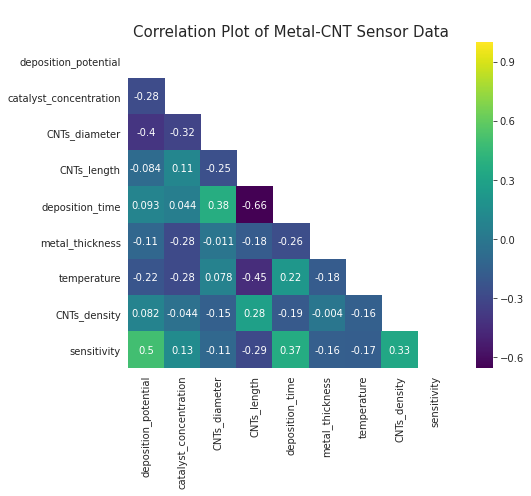

In [22]:
plt.figure(figsize=(8,6))
corr = df_metal.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='viridis')
plt.title('\nCorrelation Plot of Metal-CNT Sensor Data', fontsize=15)
plt.show()

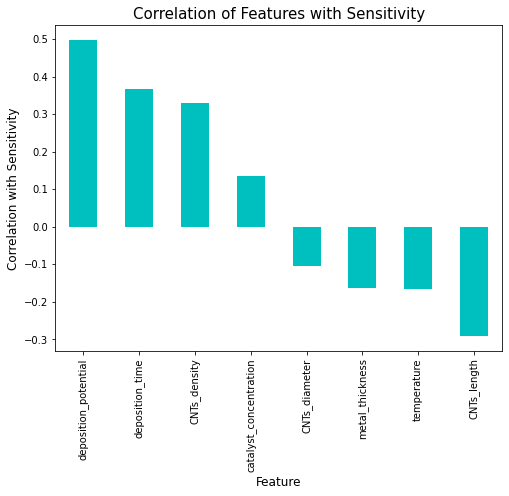

In [23]:
plt.figure(figsize=(8,6))
df_metal.corr()['sensitivity'].sort_values(ascending=False).drop(['sensitivity']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=12)
plt.ylabel('Correlation with Sensitivity',fontsize=12)
plt.title('Correlation of Features with Sensitivity',fontsize=15)
plt.show()

**We can see that there is a direct correlation between sensitivity and other variables such as deposition_potential, deposition_time, CNTs_density and catalyst_concentration. However, there is an inverse correlation between sensitivity and CNTs_diameter, metal_thickness temperature and CNTs_length.**

**We create a histogram of the sensitivity column.**

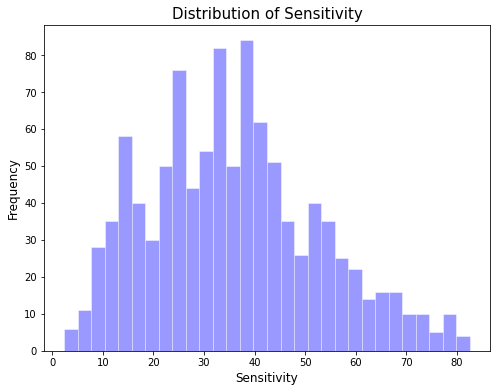

In [24]:
plt.figure(figsize=(8,6))
sns.distplot(df_metal['sensitivity'], bins=30, kde=False, hist_kws=dict(edgecolor='w'), color='b')
plt.xlabel('Sensitivity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Sensitivity', fontsize=15)
plt.show()

**We create a countplot of the metal feature column to find out the number of fabricated sensors prepared by the deposition of diffrenent metals. We sort the order of values.**

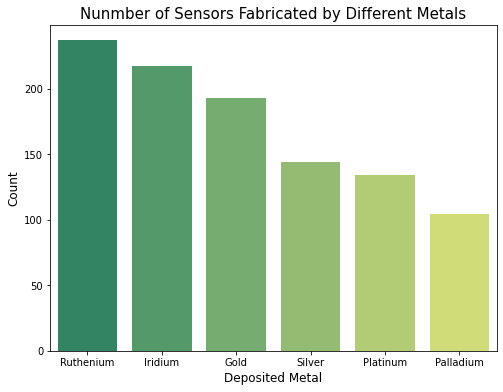

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x='metal', data=df_metal, order=list(df_metal['metal'].value_counts().sort_values(ascending=False).index), palette='summer')
plt.xlabel('Deposited Metal', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Nunmber of Sensors Fabricated by Different Metals', fontsize=15)
plt.show()

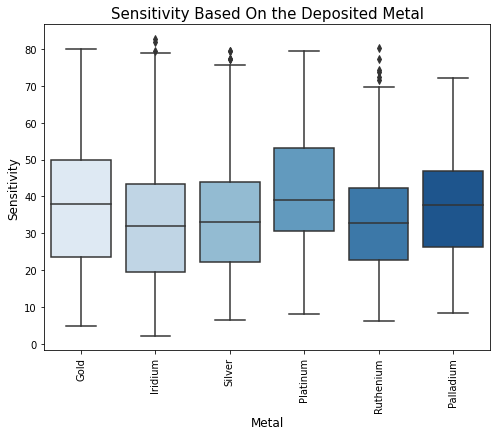

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(x='metal', y='sensitivity', data=df_metal, palette='Blues')
plt.xticks(rotation=90)
plt.xlabel('Metal', fontsize=12)
plt.ylabel('Sensitivity', fontsize=12)
plt.title('Sensitivity Based On the Deposited Metal', fontsize=15)
plt.show()

**We can see that the sensors prepared by Platinum has the highest median sensitivity.**

**We create a treemap of the mean and median sensitivity of sensors fabricated with different metals.**

In [27]:
df_metal_mean_median=pd.DataFrame({'Mean Sensitivity':df_metal.groupby('metal').mean()['sensitivity'], 'Median Sensitivity':df_metal.groupby('metal').median()['sensitivity']})
df_metal_mean_median.sort_values(by=['Mean Sensitivity','Median Sensitivity'], ascending=False, inplace=True) 
df_metal_mean_median.reset_index(inplace=True)

In [28]:
df_metal_mean_median

metal  Mean Sensitivity  Median Sensitivity
0   Platinum         40.884280           39.127763
1       Gold         37.323950           38.074244
2  Palladium         37.121772           37.600574
3     Silver         35.719425           33.051756
4  Ruthenium         34.006705           32.720463
5    Iridium         32.787393           31.971002

In [29]:
fig=px.treemap(df_metal_mean_median, path=['metal'], values='Median Sensitivity', color='Mean Sensitivity', color_continuous_scale='tropic', width=740, height=500)
fig.update_traces(textposition='middle center', textfont_size=14)
fig.update_layout(
    title={
        'text': 'Distribution of the Mean and Median Sensitivities of Sensors',
        'y':0.92,
        'x':0.455,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

**We can see that the sensors prepared by Platinum has not only the highest median sensitivity but also the highest mean sensitivity. Gold, Palladium, Silver and Ruthenium are in the next places regarding median and mean sensitivities. Iridium has the lowest median and mean sensitivities.**

**We create a barplot to compare the maximum and minimum sensitivities of sensors modified with different deposited metals.**

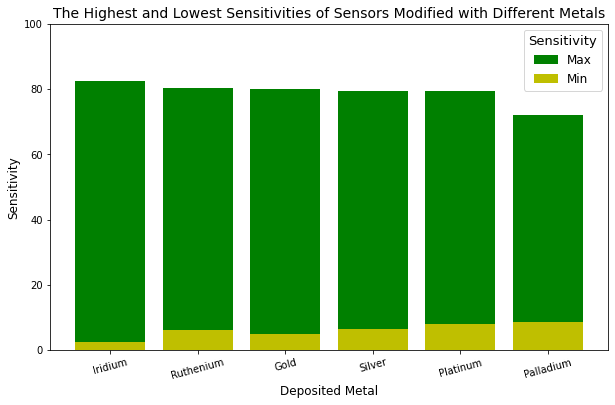

In [30]:
plt.figure(figsize=(10,6))
plt.bar(x=list(df_metal.groupby('metal').max()['sensitivity'].sort_values(ascending=False).index), height=list(df_metal.groupby('metal').max()['sensitivity'].sort_values(ascending=False).values), color='g')
plt.bar(x=list(df_metal.groupby('metal').min()['sensitivity'].index), height=list(df_metal.groupby('metal').min()['sensitivity'].values), color='y')
plt.title('The Highest and Lowest Sensitivities of Sensors Modified with Different Metals', fontsize=14)
plt.xlabel('Deposited Metal', fontsize=12)
plt.ylabel('Sensitivity', fontsize=12)
plt.ylim(0,100)
plt.legend(['Max', 'Min'], title='Sensitivity', loc='best',fontsize=12,title_fontsize=13)
plt.xticks(rotation=15)
plt.show()

**We can see that both the maximum and minimum sensitivity are related to the sensors prepared by Iridium.**

**We create interactive kde plots with Plotly to compare the distribution of sensitivities based on the deposited metal.**

In [31]:
fig=ff.create_distplot(hist_data=[df_metal[df_metal['metal']=='Gold']['sensitivity'].tolist(), df_metal[df_metal['metal']=='Iridium']['sensitivity'].tolist(), df_metal[df_metal['metal']=='Silver']['sensitivity'].tolist(), df_metal[df_metal['metal']=='Platinum']['sensitivity'].tolist(), df_metal[df_metal['metal']=='Ruthenium']['sensitivity'].tolist(), df_metal[df_metal['metal']=='Palladium']['sensitivity'].tolist()], group_labels=['Gold', 'Iridium', 'Silver', 'Platinum', 'Ruthenium', 'Palladium'], show_hist=False, show_rug=False)
fig.update_layout(
    title={
        'text': "Distribution of the Sensitivities of Sensors Per Deposited Metals",
        'y':0.92,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

**We create a dynamic 3D scatter plot kde with Plotly Express to study the influence of deposition potential and deposition time on metal thickness and sensitivity.** 

In [32]:
fig=px.scatter_3d(data_frame=df_metal, x='deposition_potential', y='deposition_time', z='metal_thickness', color='sensitivity',color_continuous_scale='viridis')
fig.update_layout(
    title={
        'text': 'Sensitivity vs. Metal Thickness, Deposition Potential, Deposition Time',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

**We create a bubble plot to study the relationship between CNTs_diameter, CNTs_Length and Sensitivity.** 

In [33]:
df_metal.iplot(kind='bubble', x='CNTs_diameter', y='CNTs_length', size='sensitivity', color='yellowgreen', xTitle='CNTs_diameter', yTitle='CNTs_length', title='Sensitivity Versus CNTs_diameter and CNTs_Length')

**We create a lmplot to study variations of the sensitivity of sensors versus the thickness of deposited metals.**

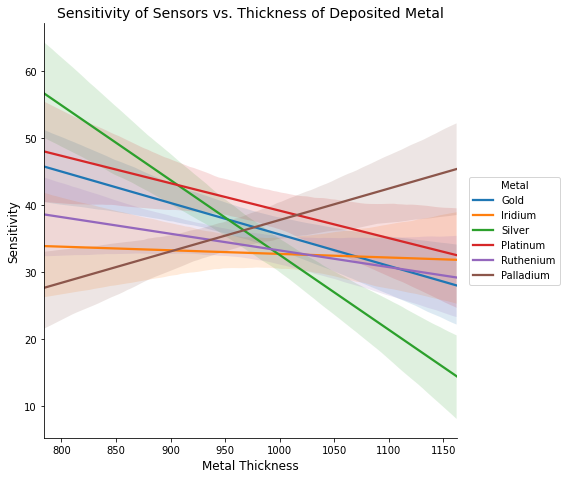

In [34]:
sns.lmplot (x='metal_thickness', y='sensitivity', data=df_metal, scatter=False, hue='metal', legend=False, height=6.5)
plt.title('Sensitivity of Sensors vs. Thickness of Deposited Metal', fontsize=14)
plt.legend(title='Metal', bbox_to_anchor=(1.25,0.5), borderaxespad=0, loc='right')
plt.xlabel('Metal Thickness', fontsize=12)
plt.ylabel('Sensitivity', fontsize=12)
plt.show()

**We can see that except for Palladium, the sensitivity of sensors increase when metals with lower thicknesses are deposited on the sensors.**

**As mentioned above, when Platinum is deposited, the highest median and mean sensitivity are obtained. So, it is the best metal to be deposited on the CNT sensor. Now we create a PairGrid to study  the influence of different operating parameters on the sensitivity when the best performing metal is deposited.**

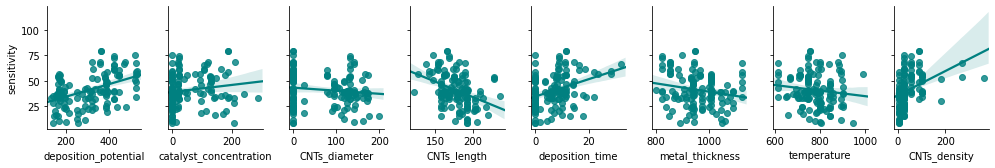

In [35]:
new=sns.PairGrid(df_metal[df_metal['metal']=='Platinum'], y_vars=['sensitivity'], x_vars=['deposition_potential','catalyst_concentration', 'CNTs_diameter','CNTs_length','deposition_time','metal_thickness','temperature','CNTs_density'], height=2.5, aspect=0.7)
new.map(sns.regplot,color='teal') 
plt.show()

**From the above analysis, we can see that the operating parameters which mainly increase the sensitivity of the Platinum-modified sensors are CNTs_density, deposition_time, deposition_potential and catalyst_concentration, respectively. However, there is an inverse relationship between sensitivity and  CNTs_diameter, CNTs_length, metal_thickness and temperature.** 

**We create a countplot of the test_month column to find out the number of fabricated sensors in each month. We sort the order of values.**

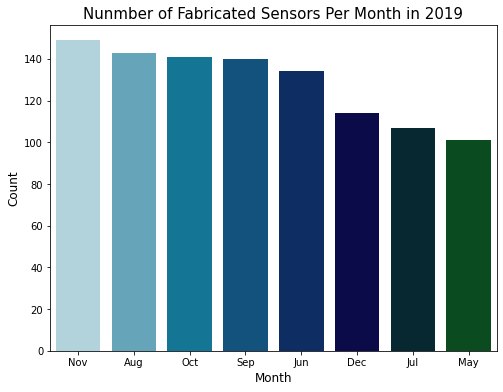

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x='test_month', data=df_metal, order=list(df_metal.groupby('test_month').count()['metal'].sort_values(ascending=False).index), palette='ocean_r')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Nunmber of Fabricated Sensors Per Month in 2019', fontsize=15)
plt.show()

**We create a sunburst of mean sensitivities of sensors fabricated in each month with differnet deposited metals.**

In [37]:
fig=px.sunburst(data_frame=df_metal, path=['test_month','metal'], color='sensitivity', color_continuous_scale='algae')
fig.update_layout(
    title={
        'text': 'Mean Sensitivity of Sensors Fabricated by Different Metals in Each Month in 2019',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

**We can see that the highest amount of mean sensivity was obtained in August for sensors prepared by Platinum.**

**We create a heatmap of max sensitivities of sensors fabricated in each month with differnet deposited metals.**

In [38]:
list_1=[]
for x in ['May','Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']:
    df_metal_mo=df_metal[df_metal['test_month']==x]
    list_2=[]
    for y in df_metal['metal'].unique():
        list_2.append(df_metal_mo[df_metal_mo['metal']==y].max()['sensitivity'])
    list_1.append(list_2)

In [39]:
df_metal_number=pd.DataFrame(data=list_1, columns= df_metal['metal'].unique(), index=['May','Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec'])

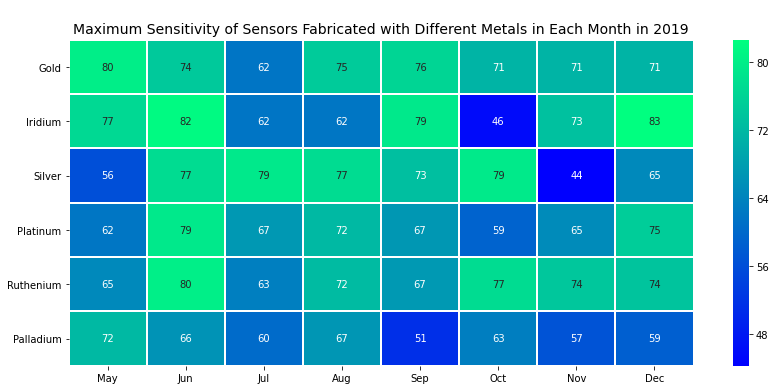

In [40]:
plt.figure(figsize=(14,6))
sns.heatmap(df_metal_number.transpose(), cmap='winter', linecolor='white', linewidth= 1, annot=True)
plt.title('\nMaximum Sensitivity of Sensors Fabricated with Different Metals in Each Month in 2019',fontsize=14)
plt.show()

**We create violinplots to visualize the distribution CNTs_diameter, CNTs_length and CNTs_density for different deposited metals.**

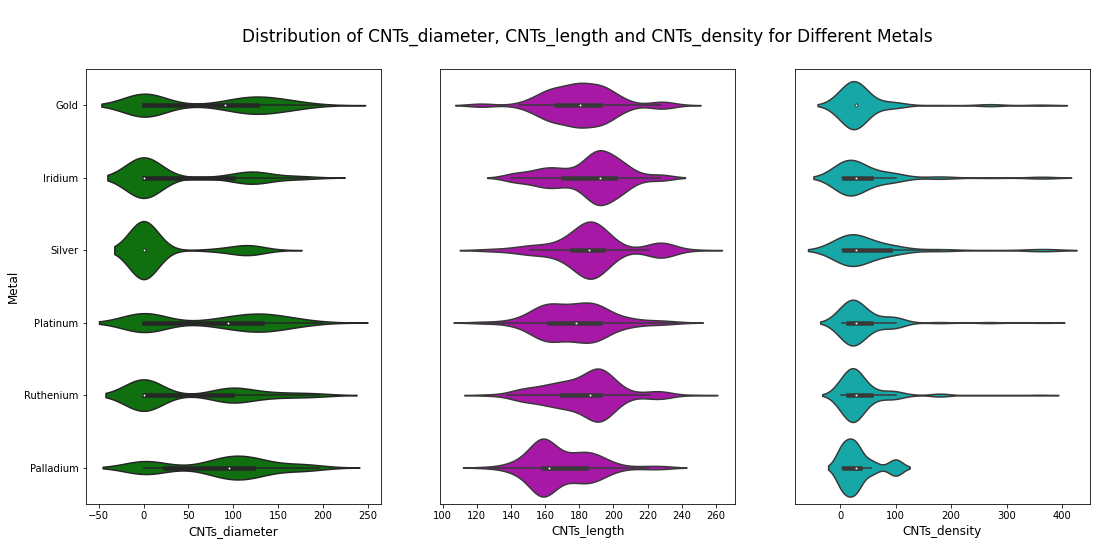

In [41]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.violinplot(x='CNTs_diameter', y='metal', data=df_metal,color='g')
plt.xlabel('CNTs_diameter', fontsize=12)
plt.ylabel('Metal', fontsize=12)

plt.subplot(1,3,2)
sns.violinplot(x='CNTs_length', y='metal', data=df_metal,color='m')
plt.xlabel('CNTs_length', fontsize=12)
plt.ylabel(' ')
plt.yticks([])
plt.title('\nDistribution of CNTs_diameter, CNTs_length and CNTs_density for Different Metals\n', fontsize=17)

plt.subplot(1,3,3)
sns.violinplot(x='CNTs_density', y='metal', data=df_metal,color='c')
plt.xlabel('CNTs_density', fontsize=12)
plt.ylabel(' ')
plt.yticks([])
plt.show()

### 2.5. Predicting the Sensitivity of Metal-CNT Sensors by Regression Models

**In this section, we implement several machine learning algorithms to predict the sensitivity of Metal-CNT sensors for the detection of sulfide ions. First, we convert the metal column into numeric values.** 

#### 2.5.1. Encoding Categorical Variables 

In [42]:
le_metal=LabelEncoder()
le_metal.fit(df_metal['metal'])

LabelEncoder()

In [43]:
df_metal['metal']=le_metal.transform(df_metal['metal'])

#### 2.5.2. Splitting Data into Train and Test Subsets

**We split Metal-CNT Sensor Dataset into training and test sets. The dependent variable is sensitivity, and independent variables are metal, deposition_potential, catalyst_concentration, CNTs_diameter, CNTs_length, deposition_time, metal_thickness, temperature and CNTs_density.**

In [44]:
X=df_metal[['metal','deposition_potential','catalyst_concentration', 'CNTs_diameter','CNTs_length','deposition_time','metal_thickness','temperature','CNTs_density']]
y=df_metal['sensitivity']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

#### 2.5.3. Linear Regression

In [46]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
predictions_lr=lr.predict(X_test)

In [48]:
print('MAE_Linear Regression=', metrics.mean_absolute_error(y_test,predictions_lr))
print('MSE_Linear Regression=', metrics.mean_squared_error(y_test,predictions_lr))
print('RMSE_Linear Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_lr)))
print('MAPE_Linear Regression=', 100*metrics.mean_absolute_error(y_test,predictions_lr)/df_metal['sensitivity'].mean())
print('R2 Score_Linear Regression=',metrics.r2_score(y_test,predictions_lr))

MAE_Linear Regression= 8.459439408290164
MSE_Linear Regression= 107.69840724820236
RMSE_Linear Regression= 10.377784313050757
MAPE_Linear Regression= 23.61527552777304
R2 Score_Linear Regression= 0.5739999949300721


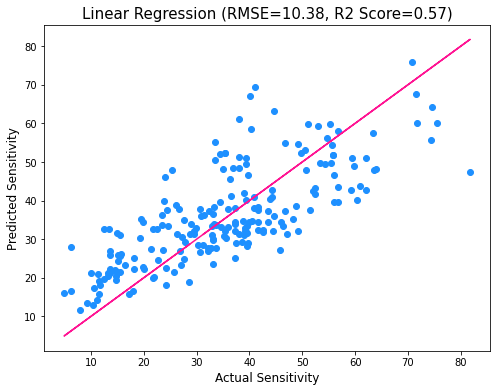

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_lr, color='dodgerblue')
plt.plot(y_test,y_test, color='deeppink')
plt.xlabel('Actual Sensitivity',fontsize=12)
plt.ylabel('Predicted Sensitivity',fontsize=12)
plt.title('Linear Regression (RMSE=10.38, R2 Score=0.57)',fontsize=15)
plt.show()

#### 2.5.4. Support Vector Regression

In [50]:
svr=SVR(gamma='auto')
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [51]:
predictions_svr=svr.predict(X_test)

In [52]:
print('MAE_Support Vector Regression=', metrics.mean_absolute_error(y_test,predictions_svr))
print('MSE_Support Vector Regression=', metrics.mean_squared_error(y_test,predictions_svr))
print('RMSE_Support Vector Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_svr)))
print('MAPE_Support Vector Regression=', 100*metrics.mean_absolute_error(y_test,predictions_svr)/df_metal['sensitivity'].mean())
print('R2 Score_Support Vector Regression=',metrics.r2_score(y_test,predictions_svr))

MAE_Support Vector Regression= 12.476383409489829
MSE_Support Vector Regression= 249.02082255933948
RMSE_Support Vector Regression= 15.780393612306996
MAPE_Support Vector Regression= 34.82893104199094
R2 Score_Support Vector Regression= 0.01500055215935514


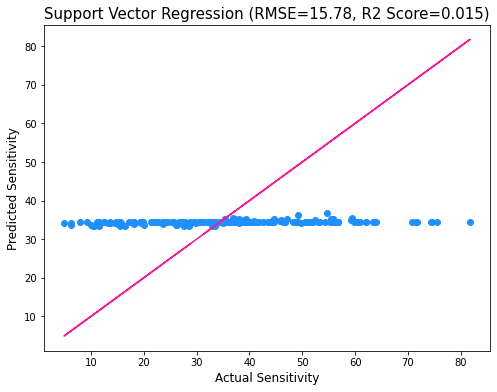

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_svr, color='dodgerblue')
plt.plot(y_test,y_test, color='deeppink')
plt.xlabel('Actual Sensitivity',fontsize=12)
plt.ylabel('Predicted Sensitivity',fontsize=12)
plt.title('Support Vector Regression (RMSE=15.78, R2 Score=0.015)',fontsize=15)
plt.show()

#### 2.5.5. Decision Tree Regression 

In [54]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [55]:
predictions_dtr=dtr.predict(X_test)

In [56]:
print('MAE_Decision Tree Regression=', metrics.mean_absolute_error(y_test,predictions_dtr))
print('MSE_Decision Tree Regression=', metrics.mean_squared_error(y_test,predictions_dtr))
print('RMSE_Decision Tree Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_dtr)))
print('MAPE_Decision Tree Regression=', 100*metrics.mean_absolute_error(y_test,predictions_dtr)/df_metal['sensitivity'].mean())
print('R2 Score_Decision Tree Regression=',metrics.r2_score(y_test,predictions_dtr))

MAE_Decision Tree Regression= 4.228509928689904
MSE_Decision Tree Regression= 41.68556636021616
RMSE_Decision Tree Regression= 6.456436041673158
MAPE_Decision Tree Regression= 11.804260568386692
R2 Score_Decision Tree Regression= 0.8351131466608452


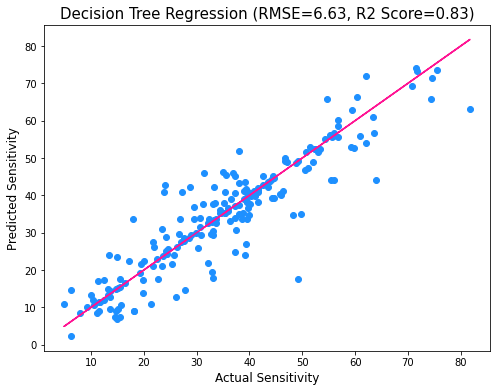

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_dtr, color='dodgerblue')
plt.plot(y_test,y_test, color='deeppink')
plt.xlabel('Actual Sensitivity',fontsize=12)
plt.ylabel('Predicted Sensitivity',fontsize=12)
plt.title('Decision Tree Regression (RMSE=6.63, R2 Score=0.83)',fontsize=15)
plt.show()

#### 2.5.6. Random Forest Regression

In [58]:
rfr=RandomForestRegressor(n_estimators=200)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [59]:
predictions_rfr=rfr.predict(X_test)

In [60]:
print('MAE_Random Forest Regression=', metrics.mean_absolute_error(y_test,predictions_rfr))
print('MSE_Random Forest Regression=', metrics.mean_squared_error(y_test,predictions_rfr))
print('RMSE_Random Forest Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_rfr)))
print('MAPE_Random Forest Regression=', 100*metrics.mean_absolute_error(y_test,predictions_rfr)/df_metal['sensitivity'].mean())
print('R2 Score_Random Forest Regression=',metrics.r2_score(y_test,predictions_rfr))

MAE_Random Forest Regression= 3.4685532087161968
MSE_Random Forest Regression= 24.865398465195515
RMSE_Random Forest Regression= 4.986521680008573
MAPE_Random Forest Regression= 9.6827739703771
R2 Score_Random Forest Regression= 0.9016451575943258


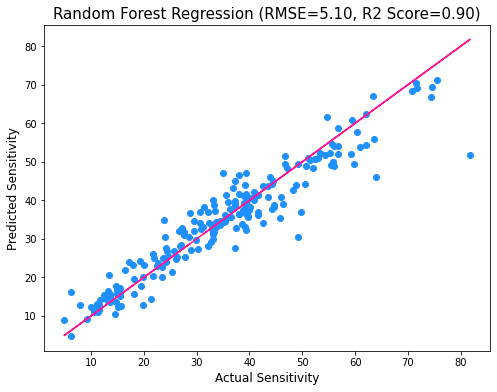

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_rfr, color='dodgerblue')
plt.plot(y_test,y_test, color='deeppink')
plt.xlabel('Actual Sensitivity',fontsize=12)
plt.ylabel('Predicted Sensitivity',fontsize=12)
plt.title('Random Forest Regression (RMSE=5.10, R2 Score=0.90)' ,fontsize=15)
plt.show()

**The Random Forest regression model is the best model for predicting the sensitivity of Metal-CNT sensors due to its low RMSE and high R2 Score.**

## 3. Research Centers-Countries Dataset 

### 3.1. Loading Dataset

In [62]:
df_world=pd.read_excel('Research Centers-Countries Dataset.xlsx')

In [63]:
df_world.head(5)

country                  research_center    sensor  sensitivity_to_sulfide  \
0   Japan    Tokyo Institute of Technology   SnO-CNT                    70.0   
1   India  Indian Institute of Technology     Si-CNT                    18.0   
2  Taiwan      National Taiwan University   PDMS-CNT                    68.0   
3   China               Jiangsu University    Pd-CNT                   118.0   
4     USA          The University of Texas  Cu2O-CNT                    25.0   

   CNTs_density   
0            400  
1            168  
2            215  
3            310  
4            208

In [64]:
df_world.shape

(28, 5)

In [65]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
country                   28 non-null object
research_center           28 non-null object
sensor                    28 non-null object
sensitivity_to_sulfide    28 non-null float64
CNTs_density              28 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ KB


**The Data is clean and does not need Data Cleaning and Feature Engineering.**

### 3.2. Exploratory Data Analysis

**We create a treemap of the countries and research centers to visualize the properties of their fabricated sensors.**

In [66]:
fig=px.treemap(df_world, path=['country', 'research_center'], values='CNTs_density ', color='sensitivity_to_sulfide', hover_data= ['sensor'], color_continuous_scale='teal', width=1000, height=800)
fig.update_traces(textposition='middle center', textfont_size=15)
fig.update_layout(
    title={
        'text': 'Sensitivity of Sensors Fabricated Throughout the World for Detection of Sulfide Ions',
        'y':0.96,
        'x':0.455,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

**We create an international choropleth map that shows the maximum value of sensivity reported in each country.**

In [67]:
df_world_max=df_world.groupby('country').max()
df_world_max.reset_index(inplace=True)

In [68]:
data=dict(type='choropleth',
          locations=df_world_max['country'],
          locationmode='country names',
          colorscale='aggrnyl',
          reversescale=True,
          text=df_world_max['research_center'],
          z=df_world_max['sensitivity_to_sulfide'],
          colorbar={'title': 'Sensitivity'},
          marker=dict(line=dict(color='rgb(255,255,255)', width=1)))

layout=dict(title='Maximum Sensitivity of Sensors Fabricated In Different Countries for Detection of Sulfide Ions', geo=dict(showlakes=True,showframe=False,projection={'type':'mercator'},lakecolor='rgb(85,173,240)'))

choromap=go.Figure(data=[data],layout=layout)

iplot(choromap)

## 4. Pt-CNT Sensor Dataset

**As mentioned above, when Platinum was deposited on CNT, the fabricated sensor had the highest sensitivity for the detection of sulfide ions. Therefore, the Pt-CNT was selected as the best performing sensor, and its capability for the detection of nitrate and chloride ions was evaluated.**

### 4.1. Loading Dataset

In [69]:
df_pt=pd.read_csv('Pt-CNT Sensor Dataset.csv')

In [70]:
df_pt.head(2)

Test Date Surfactant  Amino Functional Groups  Carboxyl Functional Groups  \
0   2/2/2020        SDS                        0                           1   
1  2/16/2020       DDAB                        1                           0   

   Nitrate Concentration (mM)  Open Circuit Potential (mV)  \
0                         2.5                    -3.727069   
1                        33.3                          NaN   

   Chloride Concentration (mM)  Weight Percentage of NaCl (%)  \
0                         60.0                            0.0   
1                         70.0                            0.1   

   Distilled Water (mL)  Sensor Characterization Technique  \
0                2281.0  Pt-CNT                        SEM   
1                  30.0  Pt-CNT                        TEM   

               Detection Technique  Detection of Nitrate Ions  \
0  Differential Pulse Voltammetry                           1   
1         Linear Sweep Voltammetry                          1   

   Detection of Chloride Ions  
0                           0  
1                           0

In [71]:
df_pt.shape

(126464, 14)

In [72]:
df_pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126464 entries, 0 to 126463
Data columns (total 14 columns):
Test Date                        126464 non-null object
Surfactant                       126464 non-null object
Amino Functional Groups          126464 non-null int64
Carboxyl Functional Groups       126464 non-null int64
Nitrate Concentration (mM)       126463 non-null float64
Open Circuit Potential (mV)      6697 non-null float64
Chloride Concentration (mM)      126448 non-null float64
Weight Percentage of NaCl (%)    126448 non-null float64
Distilled Water (mL)             126460 non-null float64
Sensor                           126464 non-null object
Characterization Technique       125340 non-null object
Detection Technique              126464 non-null object
Detection of Nitrate Ions        126464 non-null int64
Detection of Chloride Ions       126464 non-null int64
dtypes: float64(5), int64(4), object(5)
memory usage: 13.5+ MB


### 4.2. Data Cleaning

**We create a Series that displays the total count of missing values per column.**

In [73]:
df_pt.isnull().sum()

Test Date                             0
Surfactant                            0
Amino Functional Groups               0
Carboxyl Functional Groups            0
Nitrate Concentration (mM)            1
Open Circuit Potential (mV)      119767
Chloride Concentration (mM)          16
Weight Percentage of NaCl (%)        16
Distilled Water (mL)                  4
Sensor                                0
Characterization Technique         1124
Detection Technique                   0
Detection of Nitrate Ions             0
Detection of Chloride Ions            0
dtype: int64

**We create a Series that displays the percentage of missing values per column.**

In [74]:
(df_pt.isnull().sum())/(df_pt.shape[0])*100

Test Date                         0.000000
Surfactant                        0.000000
Amino Functional Groups           0.000000
Carboxyl Functional Groups        0.000000
Nitrate Concentration (mM)        0.000791
Open Circuit Potential (mV)      94.704422
Chloride Concentration (mM)       0.012652
Weight Percentage of NaCl (%)     0.012652
Distilled Water (mL)              0.003163
Sensor                            0.000000
Characterization Technique        0.888790
Detection Technique               0.000000
Detection of Nitrate Ions         0.000000
Detection of Chloride Ions        0.000000
dtype: float64

**Open Circuit Potential (mV) column has numerous missing data points that account for more than 94% of the total data. So we drop this column. Moreover, Characterization Technique and Sensor columns do not influence the detection capability of the sensors, so we remove these two columns as well.**

In [75]:
df_pt.drop(['Open Circuit Potential (mV)','Characterization Technique','Sensor'], axis=1,inplace=True)

**The percentage of missing data points in Nitrate Concentration (mM), Chloride Concentration (mM), Weight Percentage of NaCl, and Distilled Water (mL) columns are less than 0.5%. Therefore, we remove the rows that contain missing values in these columns.**

In [76]:
df_pt.dropna(inplace=True)

### 4.3. Feature Engineering

#### 4.3.1. Renaming Columns

In [77]:
df_pt.columns=df_pt.columns.str.lower().str.replace(" ", "_")

In [78]:
df_pt.columns=['test_date', 'surfactant', 'amino_functional_groups','carboxyl_functional_groups', 'nitrate_concentration', 'chloride_concentration', 'weight_percentage_of_Nacl', 'distilled_water', 'detection_technique', 'detection_of_nitrate_ions', 'detection_of_chloride_ions']

#### 4.3.2. Time Formatting

In [79]:
df_pt['test_date']=pd.to_datetime(df_pt['test_date'])

In [80]:
df_pt['test_year']=df_pt['test_date'].apply(lambda x: x.year)

In [81]:
df_pt['test_month']=df_pt['test_date'].apply(lambda x: x.month)

In [82]:
df_pt['test_year'].unique()

array([2020], dtype=int64)

In [83]:
df_pt.drop(['test_date','test_year'], axis=1, inplace=True)

In [84]:
df_pt['test_month']=df_pt['test_month'].apply(lambda x:calendar.month_abbr[x])

In [85]:
df_pt.head(2)

surfactant  amino_functional_groups  carboxyl_functional_groups  \
0        SDS                        0                           1   
1       DDAB                        1                           0   

   nitrate_concentration  chloride_concentration  weight_percentage_of_Nacl  \
0                    2.5                    60.0                        0.0   
1                   33.3                    70.0                        0.1   

   distilled_water              detection_technique  \
0           2281.0  Differential Pulse Voltammetry    
1             30.0         Linear Sweep Voltammetry   

   detection_of_nitrate_ions  detection_of_chloride_ions test_month  
0                          1                           0        Feb  
1                          1                           0        Feb

In [86]:
df_pt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126443 entries, 0 to 126447
Data columns (total 11 columns):
surfactant                    126443 non-null object
amino_functional_groups       126443 non-null int64
carboxyl_functional_groups    126443 non-null int64
nitrate_concentration         126443 non-null float64
chloride_concentration        126443 non-null float64
weight_percentage_of_Nacl     126443 non-null float64
distilled_water               126443 non-null float64
detection_technique           126443 non-null object
detection_of_nitrate_ions     126443 non-null int64
detection_of_chloride_ions    126443 non-null int64
test_month                    126443 non-null object
dtypes: float64(4), int64(4), object(3)
memory usage: 11.6+ MB


In [87]:
df_pt.describe()

amino_functional_groups  carboxyl_functional_groups  \
count            126443.000000               126443.000000   
mean                  0.432907                    0.499988   
std                   0.495480                    0.500002   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   1.000000                    1.000000   
max                   1.000000                    1.000000   

       nitrate_concentration  chloride_concentration  \
count          126443.000000           126443.000000   
mean                6.952992               60.230644   
std                 5.826286                6.463225   
min                 0.000000                5.000000   
25%                 3.000000               60.000000   
50%                 5.200000               62.000000   
75%                 9.000000               64.000000   
max                58.500000               70.000000   

       weight_percentage_of_Nacl  distilled_water  detection_of_nitrate_ions  \
count              126443.000000     1.264430e+05              126443.000000   
mean                    9.262676     3.298731e+03                   0.461322   
std                     7.671734     2.748385e+04                   0.498504   
min                     0.000000     2.000000e+00                   0.000000   
25%                     4.000000     2.620000e+02                   0.000000   
50%                     7.000000     6.850000e+02                   0.000000   
75%                    12.000000     1.987000e+03                   1.000000   
max                   101.000000     1.934859e+06                   1.000000   

       detection_of_chloride_ions  
count               126443.000000  
mean                     0.427979  
std                      0.494788  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      1.000000  
max                      1.000000

### 4.4. Exploratory Data Analysis

**We create a pie chart to find out the the percentage of Pt-CNT sensors that can detect different type of ions.**

In [88]:
number=[]

#Number of sensors that can only detect nitrate
number.append(df_pt[(df_pt['detection_of_nitrate_ions']==1) & (df_pt['detection_of_chloride_ions']==0)]['detection_of_chloride_ions'].count())

#Number of sensors that can only detect chloride
number.append(df_pt[(df_pt['detection_of_chloride_ions']==1) & (df_pt['detection_of_nitrate_ions']==0)]['detection_of_chloride_ions'].count())

#Number of sensors that can detect both nitrate and chloride
number.append(df_pt[(df_pt['detection_of_chloride_ions']==1) & (df_pt['detection_of_nitrate_ions']==1)]['detection_of_chloride_ions'].count())

#Number of sensors that can detect neither nitrate nor chloride
    
number.append(df_pt[(df_pt['detection_of_chloride_ions']==0) & (df_pt['detection_of_nitrate_ions']==0)]['detection_of_chloride_ions'].count())

#Number of sensors that can detect either nitrate or chloride
number.append(df_pt[((df_pt['detection_of_chloride_ions']==1) & (df_pt['detection_of_nitrate_ions']==0)) | ((df_pt['detection_of_chloride_ions']==0) & (df_pt['detection_of_nitrate_ions']==1))]['detection_of_chloride_ions'].count())

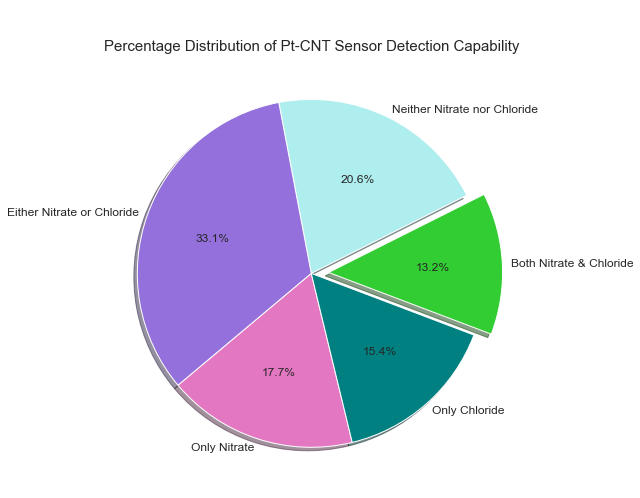

In [178]:
plt.figure(figsize=(8,8))
plt.pie(x=number,labels=['Only Nitrate', 'Only Chloride','Both Nitrate & Chloride', 'Neither Nitrate nor Chloride', 'Either Nitrate or Chloride'], pctdistance=0.6, labeldistance=1.05,autopct='%1.1f%%', explode=(0,0,0.1,0,0),shadow=True,startangle=220,textprops={'fontsize':12},colors= [ 'tab:pink', 'teal', 'limegreen','paleturquoise', 'mediumpurple'])
plt.title('\n\nPercentage Distribution of Pt-CNT Sensor Detection Capability',loc='center', fontsize=15)
plt.show()

**We can see that 13.2% of the total fabricated Pt-CNT sensors are effective in detecting both nitrate and chloride ions.**

**We create two histograms to determine the concentrations of nitarate and chloride ions that have a higher chance to be detected by Pt-CNT sensors.**

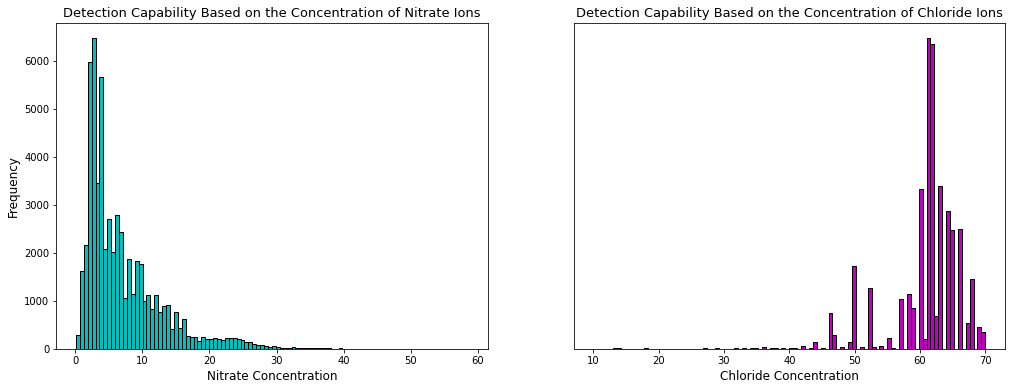

In [90]:
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
df_pt[df_pt['detection_of_nitrate_ions']==1]['nitrate_concentration'].plot(kind='hist', bins=100, edgecolor='black', color='c')
plt.title('Detection Capability Based on the Concentration of Nitrate Ions', fontsize=13)
plt.xlabel('Nitrate Concentration', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1,2,2)
df_pt[df_pt['detection_of_chloride_ions']==1]['chloride_concentration'].plot(kind='hist', bins=100, edgecolor='black', color='m')
plt.title('Detection Capability Based on the Concentration of Chloride Ions', fontsize=13)
plt.xlabel('Chloride Concentration', fontsize=12)
plt.ylabel(' ')
plt.yticks([])
plt.show()

**We conclude that if the solution contains nitrate ions with concentrations between 2 mM and 4 mM, nitrate ions have a higher chance to be detected by Pt-CNT sensor. However, if the solution contains chloride ions with concentrations between 55 mM and 65 mM, chloride ions have a higher chance to be detected by Pt-CNT sensor.** 

**We find the number of fabricated sensors which detected nitrate and chloride ions based on the applied surfactants.**

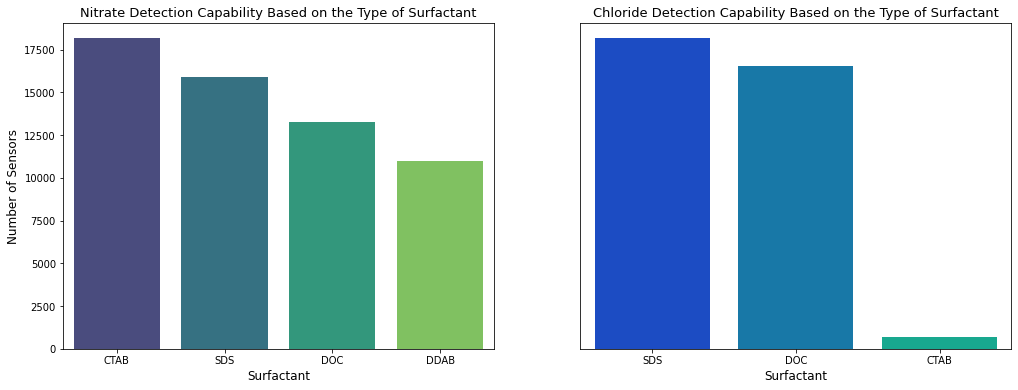

In [91]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.countplot(x='surfactant', data=df_pt[df_pt['detection_of_nitrate_ions']==1], order=list(df_pt[df_pt['detection_of_nitrate_ions']==1]['surfactant'].value_counts().sort_values(ascending=False).index), palette='viridis')
plt.title('Nitrate Detection Capability Based on the Type of Surfactant', fontsize=13)
plt.xlabel('Surfactant', fontsize=12)
plt.ylabel('Number of Sensors', fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x='surfactant', data=df_pt[df_pt['detection_of_chloride_ions']==1], order=list(df_pt[df_pt['detection_of_chloride_ions']==1]['surfactant'].value_counts().sort_values(ascending=False).index), palette='winter')
plt.title('Chloride Detection Capability Based on the Type of Surfactant', fontsize=13)
plt.xlabel('Surfactant', fontsize=12)
plt.ylabel('Number of Sensors', fontsize=12)
plt.ylabel(' ')
plt.yticks([])
plt.show()

**We see that the highest number of sensors that manged to detect nitrate and chloride ions were prepared by CTAB and SDS surfactants, respectively.**

**We find the number of fabricated sensors which detected nitrate and chloride ions based on the applied detection techniques.**

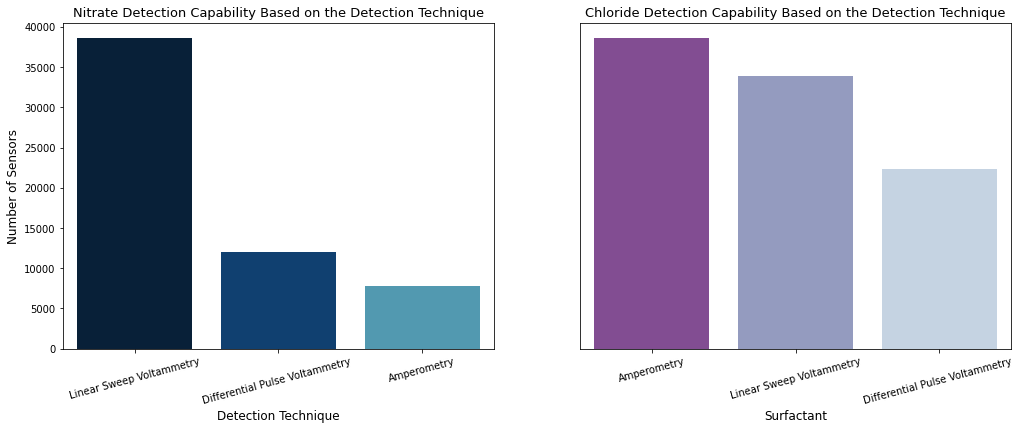

In [92]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.countplot(x='detection_technique', data=df_pt[df_pt['detection_of_nitrate_ions']==1], order=list(df_pt[df_pt['detection_of_nitrate_ions']==1]['detection_technique'].value_counts().sort_values(ascending=False).index), palette='ocean')
plt.title('Nitrate Detection Capability Based on the Detection Technique', fontsize=13)
plt.xlabel('Detection Technique', fontsize=12)
plt.xticks(rotation=15)
plt.ylabel('Number of Sensors', fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x='detection_technique', data=df_pt[df_pt['detection_of_chloride_ions']==1], order=list(df_pt[df_pt['detection_of_chloride_ions']==1]['detection_technique'].value_counts().sort_values(ascending=False).index), palette='BuPu_r')
plt.title('Chloride Detection Capability Based on the Detection Technique', fontsize=13)
plt.xlabel('Surfactant', fontsize=12)
plt.xticks(rotation=15)
plt.ylabel(' ')
plt.yticks([])
plt.show()

**We see that Linear Sweep Voltammetry was the most effective technique for the detection of nitrate ions, while Differential Pulse Voltammetry and Amperometry were less effective.On the other hand, Amperometry technique was the most effective technique for the detection of chloride ions, while Linear Sweep Voltammetry and Differential Pulse Voltammetry were less effective.**

**We use PairGrid to visualize the variation of consumed NaCl versus nitrate and chloride concentrations.**

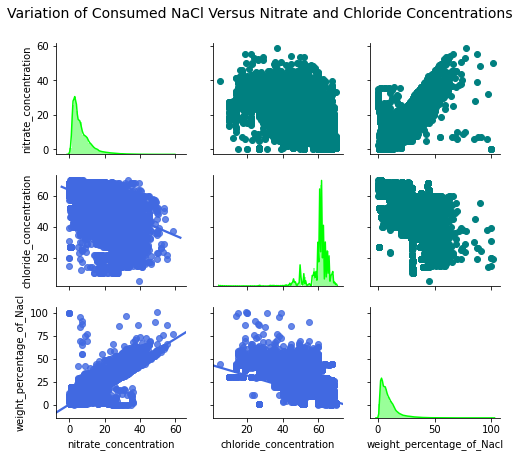

In [93]:
n=sns.PairGrid(df_pt, x_vars=['nitrate_concentration','chloride_concentration','weight_percentage_of_Nacl'],y_vars=['nitrate_concentration','chloride_concentration','weight_percentage_of_Nacl'],height=2, aspect=1.2)
n.map_upper(plt.scatter,color='teal')
n.map_diag(sns.distplot,color='lime')
n.map_lower(sns.regplot,color='royalblue')
plt.suptitle('Variation of Consumed NaCl Versus Nitrate and Chloride Concentrations',y=1.05,fontsize=14)
plt.show()

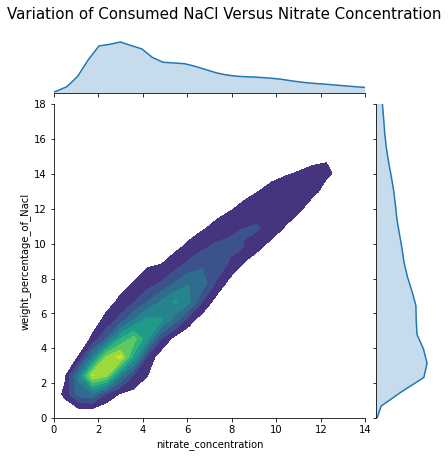

In [94]:
sns.jointplot(x='nitrate_concentration',y='weight_percentage_of_Nacl',data=df_pt,kind='kde', xlim=(0,14), ylim=(0,18), cmap='viridis',shade=True, shade_lowest=False)
plt.suptitle('Variation of Consumed NaCl Versus Nitrate Concentration',y=1.05,fontsize=15)
plt.show()

**We can see that  with the increase of nitrate concentration in the solution, the amount of required NaCl increases. However, with the increase of chloride concentration in the solution, the amount of required NaCl decreases.**

**We study the influence of the applied amino_functional_groups and carboxyl_functional_groups on the variation of consumed NaCl versus nitrate and chloride concentrations.**

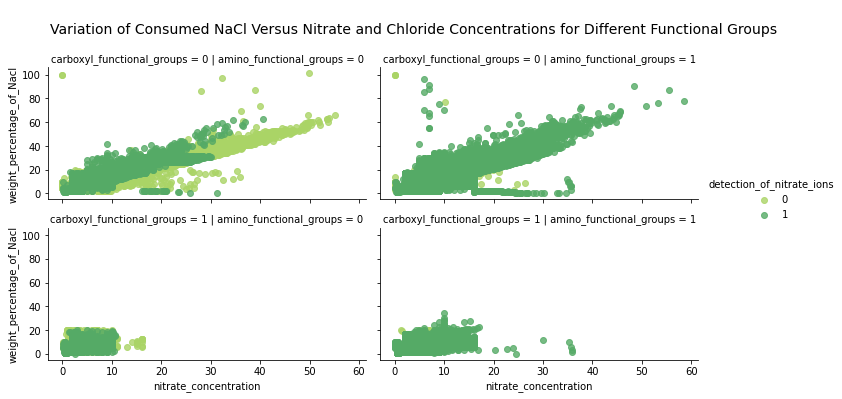

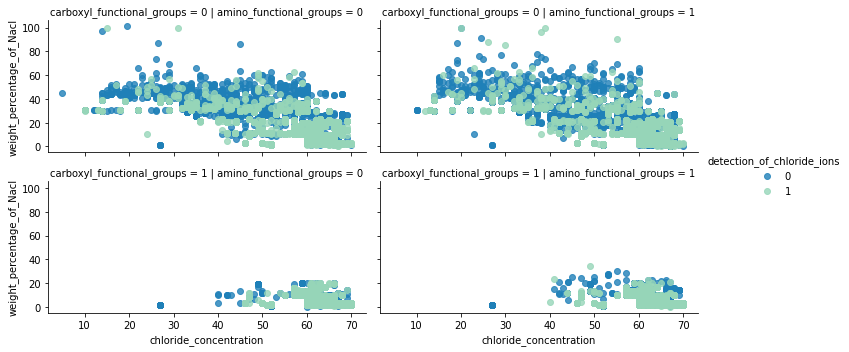

In [95]:
sns.lmplot(x='nitrate_concentration',y='weight_percentage_of_Nacl',data=df_pt, hue='detection_of_nitrate_ions',col='amino_functional_groups', row='carboxyl_functional_groups',palette='summer_r',height=2.5,aspect=2,fit_reg=False)
plt.suptitle('\nVariation of Consumed NaCl Versus Nitrate and Chloride Concentrations for Different Functional Groups',y=1.1,fontsize=14)
sns.lmplot(x='chloride_concentration',y='weight_percentage_of_Nacl',data=df_pt, hue='detection_of_chloride_ions',col='amino_functional_groups', row='carboxyl_functional_groups',palette='YlGnBu_r',height=2.5,aspect=2,fit_reg=False)
plt.show()

**We use donut plot to visualize the number of sensors fabricated by different surfactants and tested by different detection techniques in each month.**

In [96]:
ordered_months=['Jan','Feb','Mar', 'Apr', 'May', 'Jun']
df_pt_abbr_detection_technique=['DPV ', 'LSV','AMP']


a=[]
for x in ordered_months:
    b=[]
    df_pt_mo=df_pt[df_pt['test_month']==x]
    for y in df_pt['detection_technique'].unique():
        b.append(df_pt_mo[df_pt_mo['detection_technique']==y].count()['detection_technique'])
    a.append(b)

c=[]
for x in ordered_months:
    d=[]
    df_pt_mo=df_pt[df_pt['test_month']==x]
    for y in df_pt['detection_technique'].unique():
        e=[]
        df_pt_tech=df_pt_mo[df_pt_mo['detection_technique']==y]
        for z in df_pt['surfactant'].unique():
            e.append(df_pt_tech[df_pt_tech['surfactant']==z].count()['surfactant'])
        d.append(e)
    c.append(d)

month_tech=pd.DataFrame(data=a, columns=df_pt_abbr_detection_technique, index=ordered_months)
month_tech_surf=pd.DataFrame(data=c, columns=df_pt_abbr_detection_technique, index=ordered_months)

In [97]:
month_tech

DPV     LSV    AMP
Jan   2261  10043   5463
Feb   4369   8593  10170
Mar   9033   7135   8528
Apr   2370   4632  16922
May  10109   6731   7860
Jun   1598   6969   3657

In [98]:
month_tech_surf

DPV                        LSV  \
Jan      [493, 618, 667, 483]  [3156, 1274, 3177, 2436]   
Feb   [1160, 807, 1397, 1005]  [2276, 1630, 2656, 2031]   
Mar  [2342, 1957, 2885, 1849]  [1914, 1186, 2182, 1853]   
Apr      [614, 325, 960, 471]    [1217, 852, 1588, 975]   
May  [3302, 1448, 3062, 2297]  [1550, 1297, 2270, 1614]   
Jun      [481, 251, 548, 318]  [1750, 1272, 2174, 1773]   

                          AMP  
Jan  [1098, 1385, 1774, 1206]  
Feb  [2666, 1881, 3156, 2467]  
Mar  [2310, 1353, 2749, 2116]  
Apr  [4367, 3200, 5112, 4243]  
May  [1680, 1718, 2552, 1910]  
Jun    [1029, 644, 1218, 766]

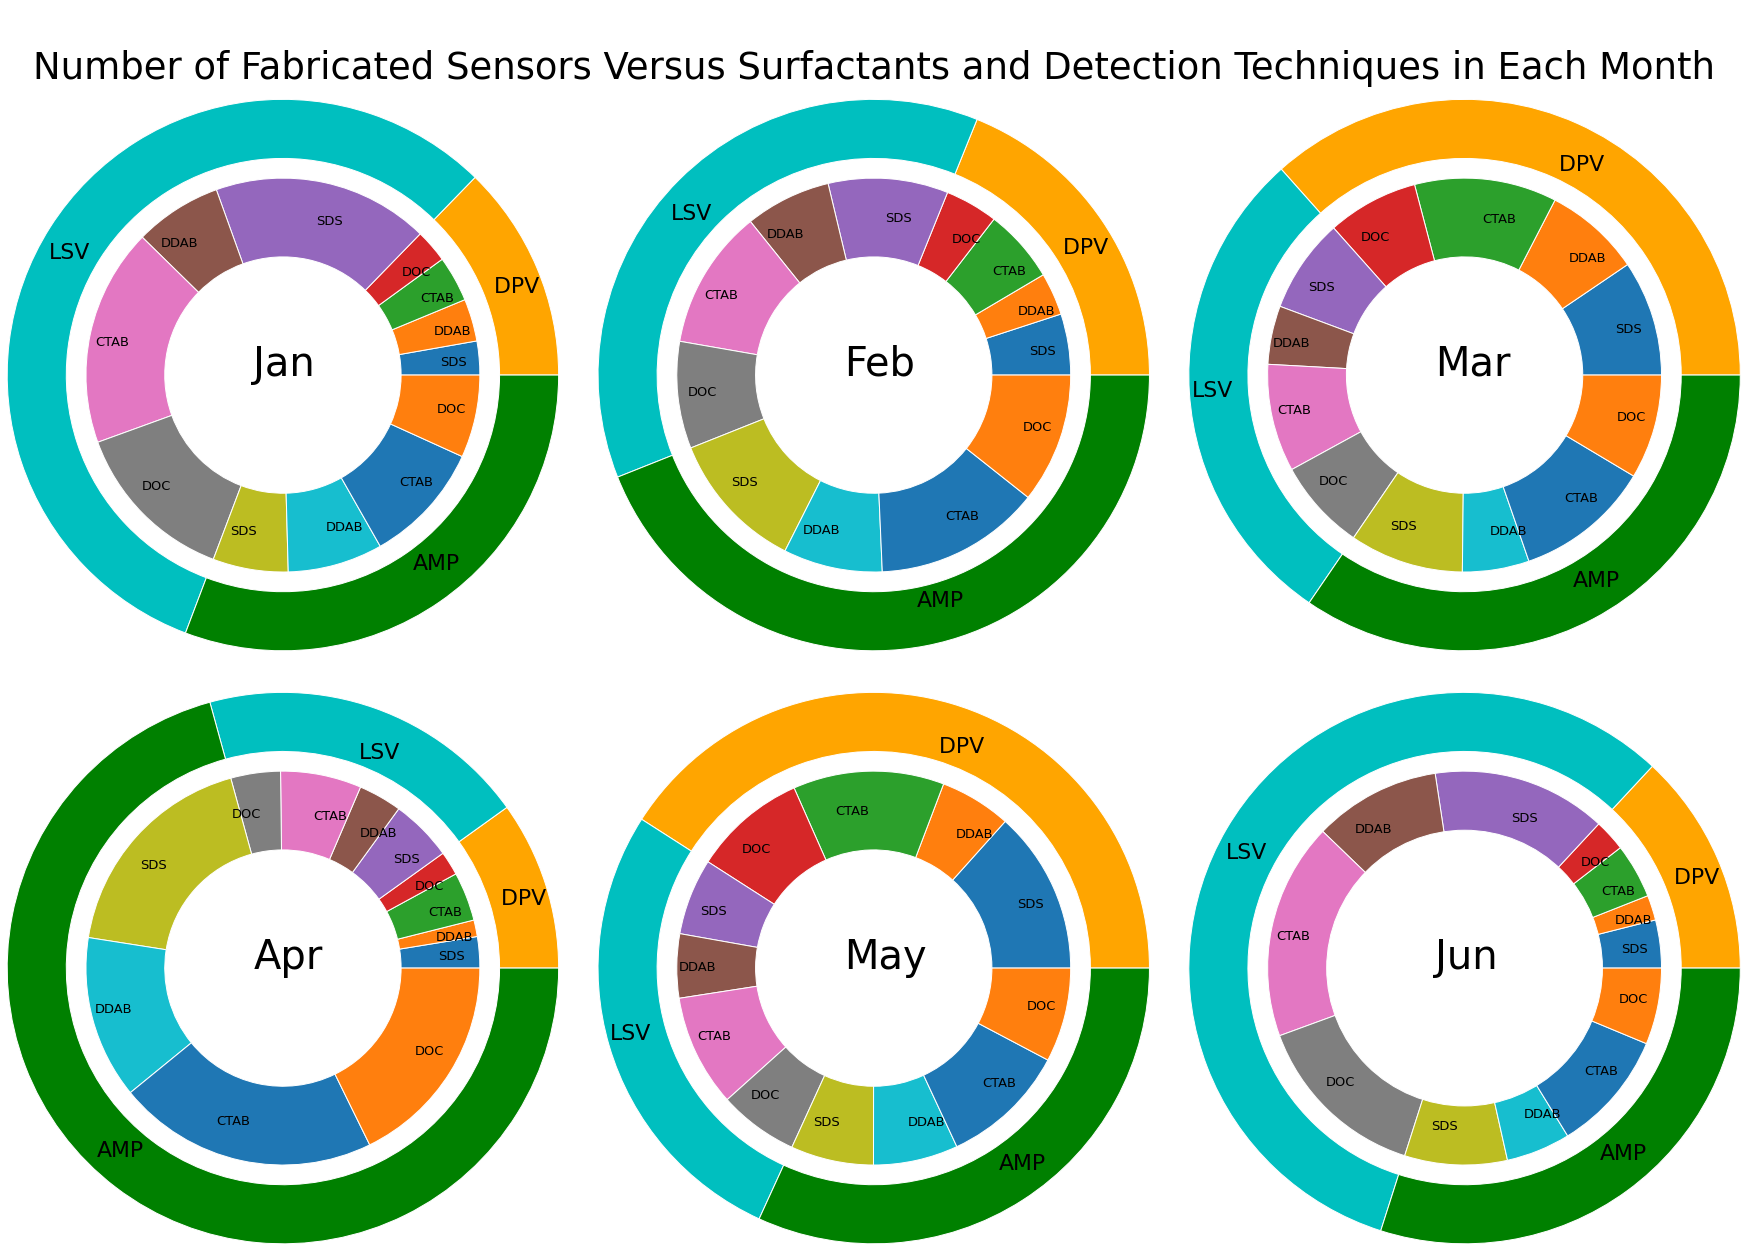

In [99]:
plt.figure(figsize=(30,20))

#Jan
plt.subplot(2,3,1)
group_names=df_pt_abbr_detection_technique
group_size=[2261,10043,5463]
subgroup_names=['SDS', 'DDAB', 'CTAB', 'DOC','SDS', 'DDAB', 'CTAB', 'DOC','SDS', 'DDAB', 'CTAB', 'DOC']
subgroup_size=[493, 618, 667, 483, 3156, 1274, 3177, 2436, 1098, 1385, 1774, 1206]
my_circle=plt.Circle( (0,0), 0.5, color='white')
pie1,_=plt.pie(group_size, radius=1.4, labels=group_names,labeldistance=0.83,textprops={'fontsize':22},colors=['orange','c','g'])
plt.setp( pie1, width=0.3, edgecolor='white')
pie2,_=plt.pie(subgroup_size, radius=1.4-0.4, labels=subgroup_names, labeldistance=0.8,textprops={'fontsize':13})
plt.setp( pie2, width=0.4, edgecolor='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
p.gca().annotate('Jan',xy=(-0.15,0), fontsize=40)

#Feb
plt.subplot(2,3,2)
group_names=df_pt_abbr_detection_technique
group_size=[4369,8593,10170]
subgroup_names=['SDS', 'DDAB', 'CTAB', 'DOC','SDS', 'DDAB', 'CTAB', 'DOC','SDS', 'DDAB', 'CTAB', 'DOC']
subgroup_size=[1160, 807, 1397, 1005, 2276, 1630, 2656, 2031, 2666, 1881, 3156, 2467]
my_circle=plt.Circle( (0,0), 0.5, color='white')
pie1,_=plt.pie(group_size, radius=1.4, labels=group_names, labeldistance=0.83,textprops={'fontsize':22},colors=['orange','c','g'])
plt.setp( pie1, width=0.3, edgecolor='white')
pie2,_=plt.pie(subgroup_size, radius=1.4-0.4, labels=subgroup_names, labeldistance=0.8,textprops={'fontsize':13})
plt.setp( pie2, width=0.4, edgecolor='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
p.gca().annotate('Feb',xy=(-0.15,0), fontsize=40)
plt.title('\nNumber of Fabricated Sensors Versus Surfactants and Detection Techniques in Each Month\n', fontsize=37, loc='center')

#Mar
plt.subplot(2,3,3)
group_names=df_pt_abbr_detection_technique
group_size=[9033,7135,8528] 
subgroup_names=['SDS', 'DDAB', 'CTAB', 'DOC','SDS', 'DDAB', 'CTAB', 'DOC','SDS', 'DDAB', 'CTAB', 'DOC']
subgroup_size=[2342, 1957, 2885, 1849, 1914, 1186, 2182, 1853, 2310, 1353, 2749, 2116]
my_circle=plt.Circle( (0,0), 0.5, color='white')
pie1,_=plt.pie(group_size, radius=1.4, labels=group_names, labeldistance=0.84,textprops={'fontsize':22},colors=['orange','c','g'])
plt.setp( pie1, width=0.3, edgecolor='white')
pie2,_=plt.pie(subgroup_size, radius=1.4-0.4, labels=subgroup_names, labeldistance=0.8, textprops={'fontsize':13})
plt.setp( pie2, width=0.4, edgecolor='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
p.gca().annotate('Mar',xy=(-0.15,0), fontsize=40)

#Apr
plt.subplot(2,3,4)
group_names=df_pt_abbr_detection_technique
group_size=[2370,4632,16922]
subgroup_names=['SDS', 'DDAB', 'CTAB', 'DOC','SDS', 'DDAB', 'CTAB', 'DOC','SDS', 'DDAB', 'CTAB', 'DOC']
subgroup_size=[614, 325, 960, 471, 1217, 852, 1588, 975, 4367, 3200, 5112, 4243]
my_circle=plt.Circle( (0,0), 0.5, color='white')
pie1,_=plt.pie(group_size, radius=1.4, labels=group_names, labeldistance=0.83,textprops={'fontsize':22},colors=['orange','c','g'])
plt.setp( pie1, width=0.3, edgecolor='white')
pie2,_=plt.pie(subgroup_size, radius=1.4-0.4, labels=subgroup_names, labeldistance=0.79, textprops={'fontsize':13})
plt.setp( pie2, width=0.4, edgecolor='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
p.gca().annotate('Apr',xy=(-0.15,0), fontsize=40)

#May
plt.subplot(2,3,5)
group_names=df_pt_abbr_detection_technique
group_size=[10109,6731,7860]
subgroup_names=['SDS', 'DDAB', 'CTAB', 'DOC','SDS', 'DDAB', 'CTAB', 'DOC','SDS', 'DDAB', 'CTAB', 'DOC']
subgroup_size=[3302, 1448, 3062, 2297, 1550, 1297, 2270, 1614, 1680, 1718, 2552, 1910]
my_circle=plt.Circle( (0,0), 0.5, color='white')
pie1,_=plt.pie(group_size, radius=1.4, labels=group_names, labeldistance=0.84,textprops={'fontsize':22},colors=['orange','c','g'])
plt.setp( pie1, width=0.3, edgecolor='white')
pie2,_=plt.pie(subgroup_size, radius=1.4-0.4, labels=subgroup_names, labeldistance=0.8, textprops={'fontsize':13})
plt.setp( pie2, width=0.4, edgecolor='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
p.gca().annotate('May',xy=(-0.15,0), fontsize=40)

#Jun
plt.subplot(2,3,6)
group_names=df_pt_abbr_detection_technique
group_size=[1598,6969,3657]
subgroup_names=['SDS', 'DDAB', 'CTAB', 'DOC','SDS', 'DDAB', 'CTAB', 'DOC','SDS', 'DDAB', 'CTAB', 'DOC']
subgroup_size=[481, 251, 548, 318, 1750, 1272, 2174, 1773, 1029, 644, 1218, 766]
my_circle=plt.Circle( (0,0), 0.7, color='white')
pie1,_=plt.pie(group_size, radius=1.4, labels=group_names, labeldistance=0.83,textprops={'fontsize':22},colors=['orange','c','g'])
plt.setp( pie1, width=0.3, edgecolor='white')
pie2,_=plt.pie(subgroup_size, radius=1.4-0.4, labels=subgroup_names, labeldistance=0.8, textprops={'fontsize':13})
plt.setp( pie2, width=0.4, edgecolor='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
p.gca().annotate('Jun',xy=(-0.15,0), fontsize=40)
plt.show()

**We study the status of the detection capability of fabricated sensors in each month.**

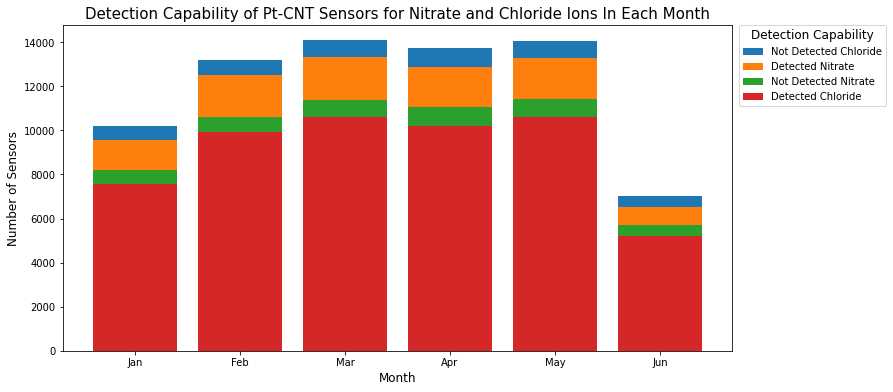

In [100]:
df_pt['test_month'].unique()   
ordered_months=['Jan','Feb','Mar', 'Apr', 'May', 'Jun']

detected_nitrate=[]
not_detected_nitrate=[]
detected_chloride=[]
not_detected_chloride=[]
for x in ordered_months:
    df_pt_month=df_pt[df_pt['test_month']==x]
    detected_nitrate.append(df_pt_month[df_pt_month['detection_of_nitrate_ions']==1]['detection_of_nitrate_ions'].count())
    not_detected_nitrate.append(df_pt_month[df_pt_month['detection_of_nitrate_ions']==0]['detection_of_nitrate_ions'].count())
    detected_chloride.append(df_pt_month[df_pt_month['detection_of_chloride_ions']==1]['detection_of_chloride_ions'].count())
    not_detected_chloride.append(df_pt_month[df_pt_month['detection_of_chloride_ions']==0]['detection_of_chloride_ions'].count())

plt.figure(figsize=(12,6))
plt.bar(x=ordered_months, height=not_detected_chloride)
plt.bar(x=ordered_months, height=not_detected_nitrate)
plt.bar(x=ordered_months, height=detected_nitrate)
plt.bar(x=ordered_months, height=detected_chloride)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Sensors', fontsize=12)
plt.legend(['Not Detected Chloride', 'Detected Nitrate', 'Not Detected Nitrate', 'Detected Chloride'], title='Detection Capability', bbox_to_anchor=(1.23,1),borderaxespad=0,fontsize=10,title_fontsize=12)
plt.title('Detection Capability of Pt-CNT Sensors for Nitrate and Chloride Ions In Each Month', fontsize=15)
plt.show()

**We can see that in March, the highest number of sensors which could detect chloride and nitrate was fabricated.**

### 4.5. Predicting the Detection Capability of Pt-CNT Sensors by Classification Models

**In this section, we implement several machine learning algorithms to predict the detection capability of Pt-CNT sensors toward nitrate and chloride ions and discover which algorithm works better for this specific dataset.** 

#### 4.5.1. Encoding Categorical Variables 

In [101]:
le_surf=LabelEncoder()
le_surf.fit(df_pt['surfactant'])

LabelEncoder()

In [102]:
df_pt['surfactant']=le_surf.transform(df_pt['surfactant'])

In [103]:
le_det=LabelEncoder()
le_det.fit(df_pt['detection_technique'])

LabelEncoder()

In [104]:
df_pt['detection_technique']=le_det.transform(df_pt['detection_technique'])

#### 4.5.2. Predicting the Detection Capability of by Pt-CNT Sensor Towards of Nitrate Ions

##### 4.5.2.1. Splitting Data into Train and Test Subsets

**We split Pt-CNT Sensor Dataset into training and test sets. The dependent variable is detection_of_nitrate_ions, and independent variables are surfactant, amino_functional_groups, carboxyl_functional_groups, nitrate_concentration, chloride_concentration, weight_percentage_of_Nacl, distilled_water, detection_technique.**

In [105]:
X=df_pt[['surfactant','amino_functional_groups','carboxyl_functional_groups','nitrate_concentration','chloride_concentration','weight_percentage_of_Nacl','distilled_water','detection_technique']]
y=df_pt['detection_of_nitrate_ions']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

##### 4.5.2.2. Logistic Regression

In [107]:
lr_nitrate=LogisticRegression()
lr_nitrate.fit(X_train,y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
predictions_lr_nitrate=lr_nitrate.predict(X_test)

In [109]:
print(confusion_matrix(y_test,predictions_lr_nitrate))
print('\n')
print(classification_report(y_test,predictions_lr_nitrate))
print('\n')
print('Accuracy Score: ',round(accuracy_score(y_test,predictions_lr_nitrate), ndigits=2))

[[18189  2197]
 [ 2693 14854]]


              precision    recall  f1-score   support

           0       0.87      0.89      0.88     20386
           1       0.87      0.85      0.86     17547

    accuracy                           0.87     37933
   macro avg       0.87      0.87      0.87     37933
weighted avg       0.87      0.87      0.87     37933



Accuracy Score:  0.87


##### 4.5.2.3. Decision Tree Classifier

In [110]:
dtc_nitrate=DecisionTreeClassifier()
dtc_nitrate.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [111]:
predictions_dtc_nitrate=dtc_nitrate.predict(X_test)

In [112]:
print(confusion_matrix(y_test,predictions_dtc_nitrate))
print('\n')
print(classification_report(y_test,predictions_dtc_nitrate))
print('\n')
print('Accuracy Score: ',round(accuracy_score(y_test,predictions_dtc_nitrate), ndigits=2))

[[18633  1753]
 [ 1928 15619]]


              precision    recall  f1-score   support

           0       0.91      0.91      0.91     20386
           1       0.90      0.89      0.89     17547

    accuracy                           0.90     37933
   macro avg       0.90      0.90      0.90     37933
weighted avg       0.90      0.90      0.90     37933



Accuracy Score:  0.9


##### 4.5.2.4. Random Forest Classifier

In [113]:
rfc_nitrate=RandomForestClassifier(n_estimators=200)
rfc_nitrate.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
predictions_rfc_nitrate=rfc_nitrate.predict(X_test)

In [115]:
print(confusion_matrix(y_test,predictions_rfc_nitrate))
print('\n')
print(classification_report(y_test,predictions_rfc_nitrate))
print('\n')
print('Accuracy Score: ',round(accuracy_score(y_test,predictions_rfc_nitrate), ndigits=2))

[[18712  1674]
 [ 1458 16089]]


              precision    recall  f1-score   support

           0       0.93      0.92      0.92     20386
           1       0.91      0.92      0.91     17547

    accuracy                           0.92     37933
   macro avg       0.92      0.92      0.92     37933
weighted avg       0.92      0.92      0.92     37933



Accuracy Score:  0.92


**So we conclude that Random Forest Classifier with the accuracy of 92% is the best model for the detection of nitrate ions by Pt-CNT Sensor.**

#### 4.5.3. Predicting the Detection Capability of by Pt-CNT Sensor Towards of Chloride Ions

**We split Pt-CNT Sensor Dataset into training and test sets. The dependent variable is detection_of_chloride_ions, and independent variables are surfactant, amino_functional_groups, carboxyl_functional_groups, nitrate_concentration, chloride_concentration, weight_percentage_of_Nacl, distilled_water, detection_technique.**

In [116]:
X=df_pt[['surfactant','amino_functional_groups','carboxyl_functional_groups','nitrate_concentration','chloride_concentration','weight_percentage_of_Nacl','distilled_water','detection_technique']]
y=df_pt['detection_of_chloride_ions']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

##### 4.5.3.1. Logistic Regression

In [118]:
lr_chloride=LogisticRegression()
lr_chloride.fit(X_train,y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
predictions_lr_chloride=lr_chloride.predict(X_test)

In [120]:
print(confusion_matrix(y_test,predictions_lr_chloride))
print('\n')
print(classification_report(y_test,predictions_lr_chloride))
print('\n')
print('Accuracy Score: ', round(accuracy_score(y_test,predictions_lr_chloride), ndigits=2))

[[18893  2799]
 [  876 15365]]


              precision    recall  f1-score   support

           0       0.96      0.87      0.91     21692
           1       0.85      0.95      0.89     16241

    accuracy                           0.90     37933
   macro avg       0.90      0.91      0.90     37933
weighted avg       0.91      0.90      0.90     37933



Accuracy Score:  0.9


##### 4.5.3.2. Decision Tree Classifier

In [121]:
dtc_chloride=DecisionTreeClassifier()
dtc_chloride.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [122]:
predictions_dtc_chloride=dtc_chloride.predict(X_test)

In [123]:
print(confusion_matrix(y_test,predictions_dtc_chloride))
print('\n')
print(classification_report(y_test,predictions_dtc_chloride))
print('\n')
print('Accuracy Score: ',round(accuracy_score(y_test,predictions_dtc_chloride), ndigits=2))

[[19850  1842]
 [ 2134 14107]]


              precision    recall  f1-score   support

           0       0.90      0.92      0.91     21692
           1       0.88      0.87      0.88     16241

    accuracy                           0.90     37933
   macro avg       0.89      0.89      0.89     37933
weighted avg       0.90      0.90      0.90     37933



Accuracy Score:  0.9


##### 4.5.3.3. Random Forest Classifier

In [124]:
rfc_chloride=RandomForestClassifier(n_estimators=200)
rfc_chloride.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
predictions_rfc_chloride=rfc_chloride.predict(X_test)

In [126]:
print(confusion_matrix(y_test,predictions_rfc_chloride))
print('\n')
print(classification_report(y_test,predictions_rfc_chloride))
print('\n')
print('Accuracy Score: ',round(accuracy_score(y_test,predictions_rfc_chloride), ndigits=2))

[[19876  1816]
 [  721 15520]]


              precision    recall  f1-score   support

           0       0.96      0.92      0.94     21692
           1       0.90      0.96      0.92     16241

    accuracy                           0.93     37933
   macro avg       0.93      0.94      0.93     37933
weighted avg       0.94      0.93      0.93     37933



Accuracy Score:  0.93


**So we conclude that Random Forest Classifier with the accuracy of 93% is the best model for the detection of chloride ions by Pt-CNT sensor.**

#### 4.5.4. Evaluating the Prediction Accuracy of Model

In [127]:
random_sensor=randint(0,df_pt.shape[0]+1)
random_sensor

67186

In [128]:
customer_data=df_pt.drop(['detection_of_nitrate_ions' , 'detection_of_chloride_ions', 'test_month'], axis=1).loc[random_sensor]

In [129]:
customer_data=customer_data.values.reshape(-1,8)

In [130]:
rfc_nitrate.predict(customer_data)

array([1], dtype=int64)

In [131]:
rfc_chloride.predict(customer_data)

array([0], dtype=int64)

**Now we check whether this sensor actually detected nitrate and chloride?**

In [132]:
df_pt.loc[random_sensor]

surfactant                      1
amino_functional_groups         1
carboxyl_functional_groups      1
nitrate_concentration         4.7
chloride_concentration         61
weight_percentage_of_Nacl     7.6
distilled_water                36
detection_technique             2
detection_of_nitrate_ions       1
detection_of_chloride_ions      0
test_month                    Jan
Name: 67186, dtype: object

**And we see that the predictions of models are accurate.**

## 5. Sulfur Cathode Properties Dataset

### 5.1. Loading Dataset

In [133]:
df_cathode=pd.read_csv('Sulfur Cathode Properties Dataset.csv')

In [134]:
df_cathode.head(2)

CAIC   FEEV   BGEV      DGMC     VLME  NSIE   EAHL        HTTR      VACC  \
0  344446  2.699  3.462  2.586424  178.513    16  0.006  171.436182  6.984720   
1  278083  2.696  2.879  3.786476  365.272    32  0.008  143.400188  7.487566   

   EDCA      KKPI      BFFE  ENGO  SSET      CAVO      DENS  HOGF       LKGH  \
0  2213  0.470701  9.037596   197     2  0.000020  0.048299   677  10.005674   
1  2076  0.738789  9.644644   147     5  0.000043  0.072942   587  10.000154   

         LBLE  
0  324.801799  
1  328.785254

In [135]:
df_cathode.shape

(339, 19)

In [136]:
df_cathode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 19 columns):
CAIC    339 non-null int64
FEEV    339 non-null float64
BGEV    339 non-null float64
DGMC    339 non-null float64
VLME    339 non-null float64
NSIE    339 non-null int64
EAHL    339 non-null float64
HTTR    339 non-null float64
VACC    339 non-null float64
EDCA    339 non-null int64
KKPI    339 non-null float64
BFFE    339 non-null float64
ENGO    339 non-null int64
SSET    339 non-null int64
CAVO    339 non-null float64
DENS    339 non-null float64
HOGF    339 non-null int64
LKGH    339 non-null float64
LBLE    339 non-null float64
dtypes: float64(13), int64(6)
memory usage: 50.4 KB


**The Data is clean and does not need Data Cleaning and Feature Engineering.**

### 5.2. Clustering by PCA and K Means Clustering 

#### 5.2.1. Step 1: Reducing Dimensionality by Principal Component Analysis (PCA)

##### 5.2.1.1. Standardizing the Data

In [137]:
ss=StandardScaler()
ss.fit(df_cathode)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [138]:
saceled_df_cathode=ss.transform(df_cathode)

##### 5.2.1.2. Finding the Optimal Number of Components 

In [139]:
pca=PCA()
pca.fit(saceled_df_cathode)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [140]:
pca.explained_variance_ratio_

array([0.11982499, 0.09115005, 0.07291206, 0.06801812, 0.06449343,
       0.05968471, 0.05947126, 0.05586391, 0.05331728, 0.05049261,
       0.04939737, 0.04457426, 0.04376503, 0.04009534, 0.03665021,
       0.03660755, 0.03003023, 0.02280946, 0.00084211])

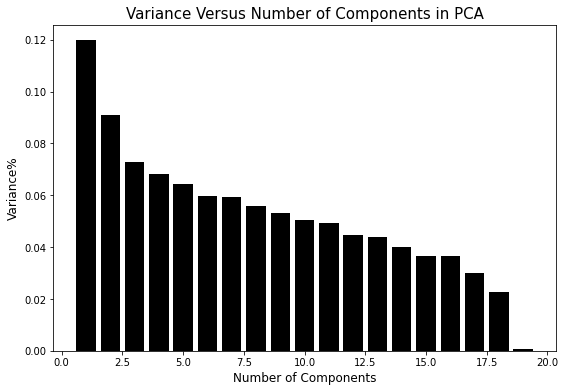

In [141]:
plt.figure(figsize=(9,6))
plt.bar(x=list(range(1,20)), height=pca.explained_variance_ratio_, color='black')
plt.xlabel('Number of Components',fontsize=12)
plt.ylabel('Variance%',fontsize=12)
plt.title('Variance Versus Number of Components in PCA', fontsize=15)
plt.show()

**There is a variance drop off at number of components=2, and the first two components explain the majority of the variance in our data. So, we reduce the dimensionality by PCA using only 2 components.**

##### 5.1.2.3. Performing PCA with the Chosen Number of Components

In [142]:
pca=PCA(n_components=2)
pca.fit(saceled_df_cathode)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [143]:
X_pca=pca.transform(saceled_df_cathode)

#### 5.2.2. Step 2: Finding the Clusters by KMeans Clustering

##### 5.2.2.1. Finding the Optimal Number of Clusters by Elbow Method

In [144]:
X=X_pca
inertia=[]
for n in range (1,11):
    model=KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
    model.fit(X_pca)
    inertia.append(model.inertia_)
    
print(inertia)

[1358.890188411934, 825.418422138232, 419.2533309248771, 345.9314630056015, 280.60193910419093, 233.55028409112396, 197.6584854154171, 176.43881390264465, 162.9176380560732, 147.17050296517576]


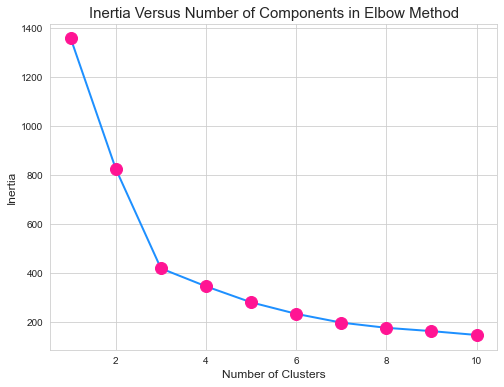

In [145]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,11)), inertia, color='dodgerblue', marker='o', linewidth=2, markersize=12, markerfacecolor='deeppink', markeredgecolor='deeppink')
plt.xlabel('Number of Clusters',fontsize=12)
plt.ylabel('Inertia',fontsize=12)
plt.title('Inertia Versus Number of Components in Elbow Method', fontsize=15)
plt.show()

**Based on the above analysis, we segment the data to 3 separate clusters.** 

##### 5.2.2.2. Performing Clustering with the Chosen Number of Clusters

In [146]:
model=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
model.fit(X_pca)
labels=model.labels_
centers=model.cluster_centers_

In [147]:
centers

array([[ 0.06205379, -1.22710844],
       [-1.29427705,  0.86457392],
       [ 2.27327283,  0.92150633]])

##### 5.2.2.3. Visualizing Clusters by Components

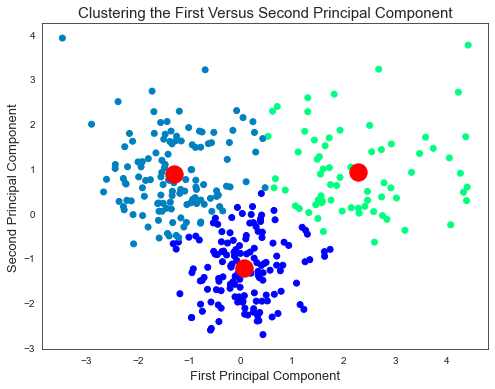

In [148]:
sns.set_style('white')
plt.figure(figsize=(8,6))
plt.scatter(x=X_pca[:,0], y=X_pca[:,1], c=labels, cmap='winter')
plt.scatter(x=centers[:,0], y=centers[:,1], c='r', s=300)
plt.xlabel('First Principal Component',fontsize=13)
plt.ylabel('Second Principal Component',fontsize=13)
plt.title('Clustering the First Versus Second Principal Component', fontsize=15)
plt.show()

##### 5.2.2.4. Adding Principal Components and Cluster Labels to the Dataset

In [149]:
pc_df_cathode=pd.DataFrame(data=X_pca, columns=['First Principal Component','Second Principal Component'])

In [150]:
con_df_cathode=pd.concat([df_cathode,pc_df_cathode],axis=1)

In [151]:
con_df_cathode['Type']=labels

In [152]:
con_df_cathode['Type']=con_df_cathode['Type'].apply(lambda x: 'First' if x==0 else 'Second' if x==1 else 'Third')

In [153]:
con_df_cathode.head(2)

CAIC   FEEV   BGEV      DGMC     VLME  NSIE   EAHL        HTTR      VACC  \
0  344446  2.699  3.462  2.586424  178.513    16  0.006  171.436182  6.984720   
1  278083  2.696  2.879  3.786476  365.272    32  0.008  143.400188  7.487566   

   EDCA  ...  ENGO  SSET      CAVO      DENS  HOGF       LKGH        LBLE  \
0  2213  ...   197     2  0.000020  0.048299   677  10.005674  324.801799   
1  2076  ...   147     5  0.000043  0.072942   587  10.000154  328.785254   

   First Principal Component  Second Principal Component   Type  
0                  -0.380550                   -1.733505  First  
1                   0.369477                   -2.220868  First  

[2 rows x 22 columns]

**So, when we reduced the dimensionality by PCA, and found out that only 2 components are needed. Then, we segmented the sulfur cathode materials to 3 separate groups.**

## 6. CNT Synthesis Dataset

### 6.1. Loading Dataset

In [154]:
df_cnt=pd.read_excel('CNT Synthesis Dataset.xlsx')

In [155]:
df_cnt.head(2)

CNT Type CNT Subtype  Growth Temperature (°C)   Gas Flow Rate (sccm)   \
0  Single-Wall    Armchair                      600                      20   
1   Multi-Wall   Parchment                      600                      40   

   Avrg. Wall Thickness (nm)  Avrg. Deposited Mass (mg)   
0                       25.1                        0.55  
1                       84.0                        0.59

In [156]:
df_cnt.shape

(59, 6)

In [157]:
df_cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
CNT Type                      59 non-null object
CNT Subtype                   59 non-null object
Growth Temperature (°C)       59 non-null int64
 Gas Flow Rate (sccm)         59 non-null int64
Avrg. Wall Thickness (nm)     55 non-null float64
Avrg. Deposited Mass (mg)     59 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.9+ KB


### 6.2. Data Cleaning

**We create a Series that displays the total count of missing values per column.**

In [158]:
df_cnt.isnull().sum()

CNT Type                      0
CNT Subtype                   0
Growth Temperature (°C)       0
 Gas Flow Rate (sccm)         0
Avrg. Wall Thickness (nm)     4
Avrg. Deposited Mass (mg)     0
dtype: int64

**We create a Series that displays the percentage of missing values per column.**

In [159]:
(df_cnt.isnull().sum())/(df_cnt.shape[0])*100

CNT Type                      0.000000
CNT Subtype                   0.000000
Growth Temperature (°C)       0.000000
 Gas Flow Rate (sccm)         0.000000
Avrg. Wall Thickness (nm)     6.779661
Avrg. Deposited Mass (mg)     0.000000
dtype: float64

**The Avrg. Wall Thickness (nm) column contains missing data points that account for about 6.8% of the total data. So we fill its missing values with the mean of this column.**

In [160]:
df_cnt['Avrg. Wall Thickness (nm)'].fillna(df_cnt['Avrg. Wall Thickness (nm)'].mean(),inplace=True)

### 6.3. Feature Engineering

#### 6.3.1. Renaming Columns

In [161]:
df_cnt.columns=df_cnt.columns.str.lower().str.replace(" ", "_")

In [162]:
df_cnt.columns=['CNT_type', 'CNT_subtype', 'growth_temperature','gas_flow_rate', 'avrg_wall_thickness','avrg_deposited_mass']

In [163]:
df_cnt.head(2)

CNT_type CNT_subtype  growth_temperature  gas_flow_rate  \
0  Single-Wall    Armchair                 600             20   
1   Multi-Wall   Parchment                 600             40   

   avrg_wall_thickness  avrg_deposited_mass  
0                 25.1                 0.55  
1                 84.0                 0.59

In [164]:
df_cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
CNT_type               59 non-null object
CNT_subtype            59 non-null object
growth_temperature     59 non-null int64
gas_flow_rate          59 non-null int64
avrg_wall_thickness    59 non-null float64
avrg_deposited_mass    59 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.9+ KB


In [165]:
df_cnt.describe()

growth_temperature  gas_flow_rate  avrg_wall_thickness  \
count           59.000000      59.000000            59.000000   
mean           615.254237      23.728814            68.900545   
std             39.669146       9.450106            23.373020   
min            600.000000      20.000000            25.100000   
25%            600.000000      20.000000            53.290000   
50%            600.000000      20.000000            68.900545   
75%            600.000000      20.000000            77.150000   
max            750.000000      60.000000           142.000000   

       avrg_deposited_mass  
count            59.000000  
mean              0.762881  
std               0.076857  
min               0.550000  
25%               0.720000  
50%               0.750000  
75%               0.810000  
max               0.930000

### 6.4. Exploratory Data Analysis

**We create a sunburst of different types and subtypes of CNTs and demonstrate their avrg_deposited_mass.**

In [166]:
fig=px.sunburst(data_frame=df_cnt,path=['CNT_type','CNT_subtype'] ,color='avrg_deposited_mass', color_continuous_scale='tropic')
fig.update_layout(
    title={
        'text': 'Average Mass of Different Types and Subtypes of Synthesized CNTs',
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

**We create a Nightingale rose chart of different subtypes of CNTs and demonstrate their avrg_wall_thickness.**

In [167]:
new=round(df_cnt.groupby('CNT_subtype').mean(), ndigits=1).reset_index()

c = new['CNT_subtype'].values.tolist()
d = new['avrg_wall_thickness'].values.tolist()

rosechart = Pie(init_opts=opts.InitOpts(width='1000px', height='500px'))

color_series = [ 'coral', 'teal', 'limegreen','royalblue', 'mediumpurple']
rosechart.set_colors(color_series)

rosechart.add("", [list(z) for z in zip(c, d)],
        radius=["20%", "95%"],  
        center=["50%", "40%"],   
        rosetype="area")

rosechart.set_global_opts(title_opts=opts.TitleOpts(title="\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tThickness of Different Subtypes of Synthesized CNTs"),
                     legend_opts=opts.LegendOpts(is_show=False),
                     toolbox_opts=opts.ToolboxOpts())

rosechart.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="inside", font_size=12, formatter="{b}\n\n{c} nm",font_weight="bold", font_family="Arial"))
rosechart.render_notebook()

C:\Users\Soha\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning:

pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)



### 6.5. Predicting the Type of Synthesize CNT K-Nearest Neighbors (KNN)

#### 6.5.1. Standardizing the Data

In [168]:
st=StandardScaler()
st.fit(df_cnt.drop(['CNT_type', 'CNT_subtype'], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [169]:
saceled_cnt=st.transform(df_cnt.drop(['CNT_type', 'CNT_subtype'], axis=1))

In [170]:
saceled_df_cnt=pd.DataFrame(data=saceled_cnt, columns=df_cnt.columns[2:])

#### 6.5.2. Splitting Data into Train and Test Subsets

In [171]:
X=saceled_df_cnt
y=df_cnt['CNT_type']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 6.5.3. Finding the Optimal Number of Neighbors (k) by Elbow Method

In [173]:
error_rate=[]

for n in range(1,40):
    knc=KNeighborsClassifier(n_neighbors=n)
    knc.fit(X_train, y_train)
    predictions_knn=knc.predict(X_test)
    error_rate.append(np.mean(predictions_knn!=y_test))

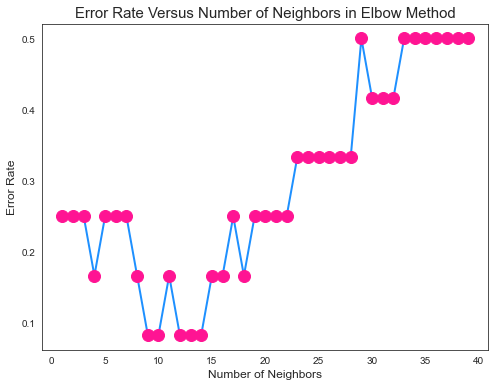

In [174]:
plt.figure(figsize=(8,6))
plt.plot(list(range(1,40)), error_rate, color='dodgerblue', marker='o', linewidth=2, markersize=12, markerfacecolor='deeppink', markeredgecolor='deeppink')
plt.xlabel('Number of Neighbors',fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('Error Rate Versus Number of Neighbors in Elbow Method', fontsize=15)
plt.show()

**We can see that for k=10, the error rate is minimum.**

In [175]:
knc=KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train, y_train)
predictions_knn=knc.predict(X_test)

In [176]:
print(confusion_matrix(y_test,predictions_knn))
print('\n')
print(classification_report(y_test,predictions_knn))
print('\n')
print('Accuracy Score: ', round(accuracy_score(y_test,predictions_knn), ndigits=2))

[[5 1]
 [0 6]]


              precision    recall  f1-score   support

  Multi-Wall       1.00      0.83      0.91         6
 Single-Wall       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



Accuracy Score:  0.92


**The K-Nearest Neighbors classification algorithm performed well with this dataset and predicted the CNT_type with 92% accuracy.**

## 7. Conclusion

- **We performed detailed exploratory data analysis on the metal-CNT sensor dataset and determined the factors that were more important to obtain a sensor with higher sensitivity. Furthermore, we implemented several machine learning regression models and concluded that the Random Forest regression was the best model for predicting the sensitivity of Metal-CNT sensors due to its high R2 Score of 0.9.**


- **We gathered the results of the research carried out at different research centers in various countries, and visualized the properties of their fabricated CNT-based sensors by treemap and choropleth map.**


- **We selected the best performing Pt-CNT sensor fabricated in the first phase with the highest sensitivity, and performed detailed exploratory data analysis on the Pt-CNT sensor dataset to determine the factors that were more crucial for enhancing the detection capability towards nitrate and chloride ions. Furthermore, we implemented several machine learning classification models and concluded that the Random Forest Classifier was the best model for predicting the detection capability of Pt-CNT sensor towards nitrate and chloride ions with the accuracies of 92% and 93%, respectively.**


- **We obtained the properties of different sulfur cathodes from the manufacturers. Then we used Principal Component Analysis (PCA) as a dimensionality reduction technique, and reduced the dimensionality to only two components. Afterwards, we implemented KMeans Clustering and segmented sulfur cathode materials into three separate clusters with respect to their crystalline structures.**


- **Finally, we analyzed the CNT synthesis dataset and used k-nearest neighbors (KNN) algorithm for classification and prediction of different types of carbon nanotubes with the accuracy of 92%.**